# Problem Set 2


---

This assignment will introduce you to:
1. Understanding the power of ReLU activation.
2. Implementing your own autograd.
3. Implementing a simple MLP.
4. Basic functionality in PyTorch

Instructions: Click *Copy to drive* at the top and enter your solutions, the code has been tested on Colab.

Submission: please upload your completed solution .ipynb file and printed PDF file to [Gradescope](https://www.gradescope.com/courses/591156) (Entry code: GP5DK6) by **Oct 9, 10PM EST**.

If you have issue viewing the figures or equations in this question set, you can refer to the PDF version [here](https://drive.google.com/file/d/1dCBvfZ1LBL667q-6ejddK3WLVfQvltxS/view?usp=sharing).

---

# Problem 1: Universal approximation power of ReLU networks (25 points)

As we dicussed in class, a two layer NN (i.e., a single hidden layer) with sigmoid activation function is a universal approximator: with sufficient hidden units, it can approximate any smooth, real function with desired accuracy. In this problem we want to demonstrate universal approximation power of NNs using ReLU activation units.  The setup is analogous to the sigmoid case, where we have a linear mapping with bias, followed by a componentwise ReLU activation, followed by another linear mapping with no bias.

## **Q1.1**
Show that, by composing only 2 hidden units in a ReLU network, i.e. $\hat{y} = \sum_{i=1}^2a_i\ max(0,b_ix+c_i)$, we can build an approximation to the step function $1[x>0]$.
The approximator should have value 1 for all values larger than some positive value $\delta$ and decreasing linearly for any value between 0 and $\delta$.

**Solution**:<br>
The 2-hidden-unit function is as follows:
\begin{equation}
    \hat{y} = a_1 \cdot \text{ReLU}(b_1x + c_1) + a_2 \cdot \text{ReLU}(b_2x + c_2).
\end{equation}

To achieve these conditions, we can design the activations for the two hidden units as follows:

\begin{equation}
\begin{aligned}
    \hat{y} & = a_1 \cdot \text{ReLU}\left(\frac{1}{\delta}\right) + a_2 \cdot \text{ReLU}(\frac{1}{\delta}x - 1).
\end{aligned}
\end{equation}

## **Q1.2**

Show that by composing 4 hidden units in a ReLU network; we can build an approximation to the unit impulse function of duration $\delta$

\begin{equation}
u_\delta(x) = 1[0\leq x\leq \delta]
\end{equation}

The approximator should have value $1$ between $\frac{\delta}{4}$ and $\frac{3\delta}{4}$ and should be increasing/decreasing on either side of this for a duration of $\frac{\delta}{2}$, i.e., it should be 0 for all values less than $\frac{-\delta}{4}$ and more than $\frac{5\delta}{4}$

**solution**:<br>
The 4-hidden-unit function is as follows:
\begin{equation}
    \hat{y} = a_1 \cdot \text{ReLU}\left(b_1x + c_1\right) + a_2 \cdot \text{ReLU}\left(b_2x + c_2\right) + a_3 \cdot \text{ReLU}\left(b_3x + c_3\right) + a_4 \cdot \text{ReLU}\left(b_4x + c_4\right).
\end{equation}

To achieve these conditions, we can design the activations for the four hidden units as follows:

\begin{equation}
\begin{aligned}
    \hat{y} = \text{ReLU}\left(\frac{2}{δ}x+\frac{1}{2}\right) - \text{ReLU}\left(\frac{2}{δ}x-\frac{1}{2}\right) + \text{ReLU}\left(\frac{2}{δ}x-\frac{5}{2}\right) - \text{ReLU}\left(\frac{2}{δ}x-\frac{3}{2}\right).
\end{aligned}
\end{equation}


## **Q1.3**
Using your approximator for the unit impulse function in Q1.2, complete the code given below to draw the approximator for different duration values $\delta$.

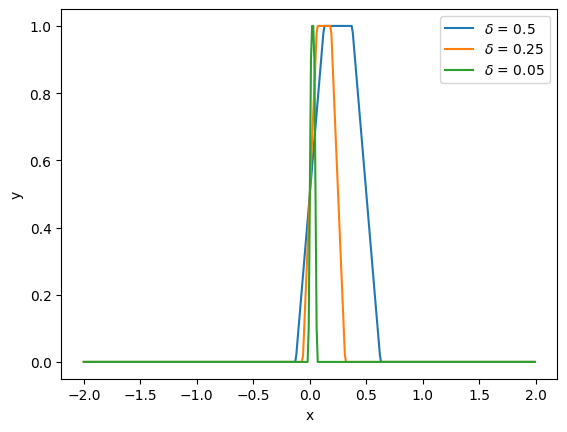

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)
    
def hat_u_delta(x,delta):
    out = relu(2/delta*x+1/2) \
    - relu(2/delta*x-1/2) \
    + relu(2/delta*x-5/2) \
    - relu(2/delta*x-3/2)
    
    return out

def draw_impulse(deltas):
    x = np.arange(-2, 2, 0.01).reshape((-1,1))
    for delta in deltas:
        plt.plot(x,hat_u_delta(x,delta))
    plt.legend(['$\delta$ = 0.5', '$\delta$ = 0.25', '$\delta$ = 0.05']);
    plt.xlabel('x')
    plt.ylabel('y');

draw_impulse([0.5, 0.25, 0.05])

## **Q1.4**
Imagine the idea of riemann integral, where we approximate the integrand function with unit impulse functions (fig(1)).
We will approximate the function $f(x)$ defined over $[a,b]$, using N impulse functions as follows:

$$\hat{f(x)} = \sum_{i=0}^{N-1} f(a + i \delta)\, u_\delta(x-i\delta), $$
where: $$\delta = \lfloor \frac{b-a}{N} \rfloor$$

![riemann-gif](https://drive.google.com/uc?id=1nY1BHbbEpdm7OE3USfc0BhbbEWlTmsvv)

Using your implemented approximator for unit impulse function in Q1.2; complete the code given bellow to approximate the $sin(x)$ function over $[0, 2\pi]$. The code will plot the approximation for different number of impule functions $N$.

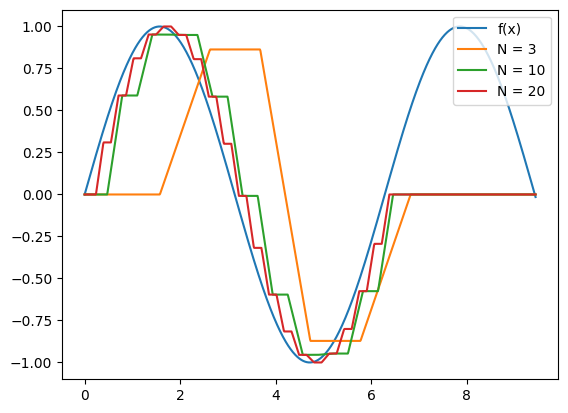

In [17]:
def f(x):
    return np.sin(x)

    
def hat_u_delta(x,delta):
    out = relu(2/delta*x+1/2) \
    - relu(2/delta*x-1/2) \
    + relu(2/delta*x-5/2) \
    - relu(2/delta*x-3/2)
    
    return out
    
def hat_f(x,N,a,b):
    d = (b-a) / N
    fx = 0
    for i in range(N):
      fx += f(a + i * d) * hat_u_delta(x - i * d, d)
        
    return fx


def draw_hat_f(N,a,b):
    x = np.arange(a, 1.5*b, 0.01).reshape((-1,1))
    plt.plot(x,f(x))
    for n in N:
        y = hat_f(x,n,a,b)
        plt.plot(x,y);
    plt.legend(["f(x)"]+["N = " + str(n) for n in N],loc = 'upper right')

draw_hat_f([3,10,20],0,2*3.15)

## **Q1.5**
Now consider using a polynomial activation function as opposed to the ReLU activation considered earlier (or the sigmoid activation that was discussed in class).  In this case, one can show that *no polynomial function* used as an activation can yield universality in a single hidden-unit network.  For concreteness and simplicity, let us consider using a simple quadratic activation function as follows:

$$\sigma(x) = x^2 + x + 1$$

This activation function is non-linear and will be applied componentwise at the hidden layer.  To demonstrate that this cannot be used as a universal approximator, consider the case where the input dimension is 1, and give an example of a function which such a network would not be able to approximate well.  (Hint: write down the form of the output $\hat{y}$ in this model.)



**solution**:<br>
Here, we will consider a single hidden layer network with $M$ hidden units and the quadratic activation function $\sigma(x) = x^2 + x + 1$. The output $\hat{y}$ can be expressed as:

\begin{equation}
  \hat{y} = \sum_{i=1}^M a_i\sigma (b_i x +c_i).
\end{equation}

We will have:
\begin{equation}
  \hat{y} = \sum_{i=1}^M a_i\sigma ((b_i x +c_i)^2 + (b_i x +c_i) + 1).
\end{equation}

Expanding and grouping terms, the output $\hat{y}$ becomes a polynomial of degree 2. The highest degree term will be quadratic, and the rest will be linear or constant.

In contrast, let's consider the function $f(x) = e^x$. This function is exponential and is not a polynomial of any degree. Since $f(x)$ is not a polynomial, the network can only produce polynomials of degree 2 or lower; it follows that the network cannot approximate $f(x)$ universally across its entire domain.

Another function that can be considered is $g(x) = sin(x)$. Since this function is periodic, it is not polynomial of any degree, and the network can only produce polynomials of degree 2 or lower. The network cannot approximate $g(x)$ universally across its entire domain.

Therefore, the network with the quadratic activation function cannot serve as a universal approximator for functions that are not polynomials of degree 2 or lower.


## **Q1.6 (Bonus)**

While one cannot show that a polynomial function can be used as an activation function in a single hidden-layer network to approximate an arbitrary smooth function, if we allow the depth of the network to increase without bound (analogous to how we let the width of the network increase to prove universality earlier), then in this case one *can* show universality of the resulting model.

Consider the quadratic activation function from the previous question, and show that if we allow the depth to increase in this model (where each layer is a linear function with bias followed by the quadratic activation function), then the resulting network can approximate any continuous real-valued function on a compact domain.

**solution**:<br>
The notion of universal approximation using deep neural networks relies on the depth of the network rather than the specific activation functions used. While it's true that certain activation functions like ReLU are known to enable universal approximation, you can demonstrate the universality of a deep network with the quadratic activation function as follows.

Consider a deep feedforward neural network with $L$ layers, where each layer consists of a linear transformation followed by the quadratic activation function $\sigma(x) = x^2 + x + 1$. The depth of the network is allowed to increase without bound ($L \rightarrow \infty$). Each layer can be represented as:

$$z^{(l)} = W^{(l)} \cdot \sigma(z^{(l-1)}) + b^{(l)},$$

Where:$\sigma(x) = x^2 + x + 1$ is the quadratic activation function.

The output of the network is given by $z^{(L)}$. To show universality, we need to demonstrate that this deep network can approximate any continuous real-valued function on a compact domain.

**Universal Approximation Theorem:**

Given a continuous real-valued function $f$ defined on a compact set $K \subset \mathbb{R}^n$, for any $\epsilon > 0$, there exists a depth-$L$ neural network with the quadratic activation function as described above such that:

$$|f(x) - z^{(L)}(x)| < \epsilon,$$
for all $x \in K$, where $z^{(L)}(x)$ is the output of the deep network.

The proof of this theorem involves demonstrating that by increasing the depth of the network, you can create a piecewise approximation of $f(x)$ that becomes arbitrarily close as $L$ goes to infinity. This is achieved through the composition of the quadratic activation function with linear transformations, allowing the network to capture complex, non-linear patterns and approach the target function $f(x)$ within any desired precision $\epsilon$.

While this sketch of the proof provides an overview of the idea, the formal proof would involve mathematical analysis, such as expressing the network's approximation as a sum of functions and demonstrating its convergence properties as the depth $L$ increases.

# Problem 2: Autograd implementation (35 points)

In class, we discussed the forward and back-propagation in network layers. We pass the input through a network layer and calculate the output of the layer straightforwardly. This step is called forward-propagation. Each layer also implements a function called 'backward'. Backward is responsible for the backward pass of back-propagation. The process of back-propagation follows the schemas: Input -> Forward calls -> Loss function -> derivative -> back-propagation of errors. In neural network, any layer can forward its results to many other layers, in this case, in order to do back-propagation, we sum the deltas coming from all the target layers.

In this problem, we will implement both forward and backward for the most commonly used layers including: linear, bias, ReLU, sigmoid, softmax, and cross-entropy.

In [41]:
'''backprop implementation with layer abstraction.
This could be made more complicated by keeping track of an actual DAG of
operations, but this way is not too hard to implement.
'''
import numpy as np


class Layer:
    '''A layer in a network.

    A layer is simply a function from R^n to R^d for some specified n and d.
    A neural network can usually be written as a sequence of layers:
    if the original input x is in R^d, a 3 layer neural network might be:

    L3(L2(L1(x)))

    We can also view the loss function as itself a layer, so that the loss
    of the network is:

    Loss(L3(L2(L1(x))))

    This class is a base class used to represent different kinds of layer
    functions. We will eventually specify a neural network and its loss function
    with a list:

    [L1, L2, L3, Loss]

    where L1, L2, L3, Loss are all Layer objects.

    Each Layer object implements a function called 'forward'. forward simply
    computes the output of a layer given its input. So instead of
    Loss(L3(L2(L1(x))), we write
    Loss.forward(L3.forward(L2.forward(L1.forward(x)))).
    Doing this computation finishes the forward pass of backprop.

    Each layer also implements a function called 'backward'. Backward is
    responsible for the backward pass of backprop. After we have computed the
    forward pass, we compute
    L1.backward(L2.backward(L3.backward(Loss.backward(1))))
    We give 1 as the input to Loss.backward because backward is implementing
    the chain rule - it multiplies gradients together and so giving 1 as an
    input makes the multiplication an identity operation.

    The outputs of backward are a little subtle. Some layers may have a
    parameter that specifies the function being computed by the layer. For
    example, a Linear layer maintains a weight matrix, so that
    Linear(x) = xW
    for some matrix W.
    The input to backward should be the gradient of the final loss with respect
    to the output of the current layer. The output of backprop should be the
    gradient of the final loss with respect to the input of the current layer,
    which is just the output of the previous layer. This is why it is correct
    to chain the outputs of backprop together. However, backward should ALSO
    compute the gradient of the loss with respect to the current layer's
    parameter and store this internally to be used in training.
    '''
    def __init__(self, parameter=None, name=None):
        self.name = name
        self.forward_called = False
        self.parameter = parameter
        self.grad = None

    def zero_grad(self):
        self.grad = None

    def forward(self, input):
        '''forward pass. Should compute layer and save relevant state
        needed for backward pass.
        Args:
            input: input to this layer.
        returns output of operation.
        '''
        raise NotImplementedError

    def backward(self, downstream_grad):
        '''Performs backward pass.

        This function should also set self.grad to be the gradient of the final
        output of the computation (loss) with respect to the layer's parameters.

        Args:
            downstream_grad: gradient from downstream operation in the
                computation graph. This package will only consider
                computation graphs that result in scalar outputs at the final
                node (e.g. loss function computations). As a result,
                the dimension of downstream_grad should match the dimension of
                the output of this layer.

                Formally, if this operation computes F(x), and the final
                computation computes a scalar, G(F(x)), then input_grad is
                dG/dF.
        returns:
            gradient to pass to upstream layers. If the layer computes F(x, w),
            where x is the input and w is the parameter of the layer, then
            the return value should be dF(x,w)/dx * downstream_grad. Here,
            x is in R^n, F(x, w) is in R^m, dF(x, w)/dx is a matrix in R^(n x m)
            downstream_grad is in R^m and * indicates matrix multiplication.

        We should also compute the gradient with respect to the parameter w.
        Again by chain rule, this is dF(x, w)/dw * downstream_grad
        '''
        raise NotImplementedError



Below shows an example of the full implementation of the Bias layer, including the forward and backward function. Notice self.grad stores the gradient of the loss with respect to the current layer's parameter.

In [42]:
class Bias(Layer):
    '''adds a constant bias.'''

    def __init__(self, bias, name="bias"):
        super(Bias, self).__init__(np.squeeze(bias), name)
        self.weights = np.squeeze(bias)

    def forward(self, input):
        self.input = input
        return self.parameter + self.input

    def backward(self, downstream_grad):
        self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))
        return downstream_grad


## **Q2.1** Multiplication layers.

Let's start with the basic linear and bias layer. Show the derivatives of linear and bias layer with respect to $X$ respectively.

$Z_{linear} = WX$



**solution**:<br>
1. **Derivative of the Linear Layer:** $Z_{\text{linear}} = WX$

   To find $\frac{\partial Z_{\text{linear}}}{\partial X}$, we can treat $W$ as a constant matrix. Using matrix calculus, we can calculate this derivative as:

   $$\frac{\partial Z_{\text{linear}}}{\partial X} = W.$$

   So, the derivative of the linear layer with respect to $X$ is simply the weight matrix $W$.

2. **Derivative of the Bias Layer:**

   Here, $b$ is a bias vector of the same shape as $X$.

   To find $\frac{\partial Z_{\text{bias}}}{\partial X}$, we can calculate it element-wise:

   $$\frac{\partial Z_{\text{bias}}}{\partial X_{ij}} = \frac{\partial (X_{ij} + b_{ij})}{\partial X_{ij}} = 1.$$


Complete the forward and backward function of the linear layer. In backward, you should ALSO set the self.grad to be the gradient of the loss with respect to the current layer's parameter.

In [43]:
class Linear(Layer):
    '''Linear layer. Parameter is NxM matrix L, input is matrix v of size B x N
    where B is batch size, output is vL.'''

    def __init__(self, weights, name="Linear"):
        super(Linear, self).__init__(weights, name)
        self.weights = weights

    def forward(self, input):
        self.input = input

        return np.dot(self.input, self.parameter)

    def backward(self, downstream_grad):
        '''downstream_grad should be NxB.'''
        if len(downstream_grad.shape) != 2:
            downstream_grad = np.reshape(
                downstream_grad, (len(downstream_grad), 1))

        self.grad = np.dot(self.input.T, downstream_grad)
        
        return np.dot(downstream_grad, self.parameter.T)



## **Q2.2** Activation layers.

Now let's look at the activation layers. Show the derivatives of ReLU, sigmoid, and Leaky ReLU.
<p>
$ReLU(x) = max(0,x)$
</p>
<p>
$\sigma(x)=\frac{1}{1+e^{-x}}$
</p>
<p>
$LeakyReLU(x) = max(0.01x,x)$

Hint: Let's assume the gradient of ReLU is 0 when $x$ is 0 and the gradient of LeakyReLU is consistent for all values $x\leq0$

**solution**:<br>
The derivatives of the ReLU, sigmoid, and Leaky ReLU activation functions are shwon below with respect to their input $x$:

1. **ReLU (Rectified Linear Unit):**
   The ReLU function is defined as $f(x) = \max(0, x)$. Its derivative is:
    \begin{equation}
           \frac{d}{dx} \text{ReLU}(x) =
       \begin{cases}
         1, & \text{if } x > 0; \\
         0, & \text{if } x \leq 0.
       \end{cases}
    \end{equation}

   In other words, it is 1 for $x > 0$ and 0 for $x \leq 0$.

1. **Sigmoid:**
   The sigmoid function is defined as $f(x) = \frac{1}{1 + e^{-x}}$. Its derivative is:
    \begin{equation}
       \frac{d}{dx} \text{sigmoid}(x) = \text{sigmoid}(x) \cdot (1 - \text{sigmoid}(x)).
    \end{equation}

   This derivative has a maximum value of 0.25 and approaches 0 as $|x|$ becomes very large (saturation).

3. **Leaky ReLU:**
   The Leaky ReLU function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (typically close to 0, _e.g._, 0.01). Its derivative is:
   \begin{equation}
       \frac{d}{dx} \text{LeakyReLU}(x) =
   \begin{cases}
     1, & \text{if } x > 0; \\
     \alpha, & \text{if } x \leq 0.
   \end{cases}
    \end{equation}

   In other words, it is 1 for $x > 0$ and $\alpha$ for $x \leq 0$.

These derivatives are essential for gradient-based optimization algorithms, such as backpropagation, which are used to train neural networks. They determine how errors are propagated backward through the network during training.

Complete the forward and backward functions. There is no need to update self.grad since there is no parameter in activation layers.

In [44]:
class ReLU(Layer):
    '''ReLU layer. No parameters.'''

    def __init__(self, name="ReLU"):
        super(ReLU, self).__init__(name=name)

    def forward(self, input):
        self.input = input
        self.output = np.maximum(input, 0.0)
        
        return self.output

    def backward(self, downstream_grad):
        grad_input = downstream_grad * (self.input > 0)
        
        return grad_input


class Sigmoid(Layer):
    '''Sigmoid layer. No parameters.'''

    def __init__(self, name="Sigmoid"):
        super(Sigmoid, self).__init__(name=name)

    def forward(self, input):
        self.input = input
        self.output = 1/(1+np.exp(-input))
        
        return self.output

    def backward(self, downstream_grad):
        return self.output * (1-self.output) * downstream_grad


class LeakyReLU(Layer):
    '''LeakyReLU layer. No parameters.'''
    def __init__(self, alpha=0.01, name="LeakyReLU"):
        super(LeakyReLU, self).__init__(name=name)
        self.alpha = alpha

    def forward(self, input):
        self.input = input
        self.output = np.where(input > 0, input, self.alpha * input)
        
        return self.output


    def backward(self, downstream_grad):
        grad_input = downstream_grad * np.where(self.input > 0, 1, self.alpha)
        
        return grad_input


## **Q2.3**  Loss *layers*.

Show the derivatives of SoftMax and Cross-entropy.

<p>
$\sigma(j)=\frac{\exp(w_j^Tx)}{\sum_{k}\exp(w_k^Tx)}$.
</p>

<p>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>


**solution**:<br>
The derivatives of the Softmax activation function and the Cross-Entropy loss function are shown below with respect to their inputs.

1. Derivative of Softmax:
   The Softmax function for element $j$ is defined as:
   \begin{equation}
       \sigma(j) = \frac{e^{w_j^T x}}{\sum_{k} e^{w_k^T x}}.
    \end{equation}

   To find the derivative of $\sigma(j)$ with respect to $w_j$, you can compute it as follows:
   \begin{equation}
       \frac{\partial \sigma(j)}{\partial w_j} = \sigma(j) \cdot (1 - \sigma(j)) \cdot x.
    \end{equation}

   This represents the gradient of the Softmax function with respect to the parameters $w_j$.

3. Derivative of Cross-Entropy Loss:
   The Cross-Entropy loss function for a binary classification problem with predicted probability $\hat{y}$ and true label $y$ is defined as:
   \begin{equation}
       L(\hat{y}, y) = -y \ln(\hat{y}) - (1 - y) \ln(1 - \hat{y}).
    \end{equation}
   
   To find the derivative of $L(\hat{y}, y)$ with respect to $\hat{y}$, you can compute it as follows:
   \begin{equation}
       \frac{\partial L(\hat{y}, y)}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}.
    \end{equation}
   
   This represents the gradient of the Cross-Entropy loss function with respect to the predicted probability $\hat{y}$.


*Complete* the forward and backward functions. There is no need to update self.grad since there is no parameter in the layers.

Hint: You may find [np.einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) helpful when computing the gradient of SoftMax.

In [45]:
class SoftMax(Layer):
    '''SoftMax Layer, no parameters.'''

    def __init__(self, name="SoftMax"):
        super(SoftMax, self).__init__(name="softmax")

    def forward(self, input):
        '''input is BxN array, B is batch dimension.'''
        self.input = input
        exp_input = np.exp(input)
        sum_exp = np.sum(exp_input, axis=1, keepdims=True)
        self.output = exp_input / sum_exp
        
        return self.output

    def backward(self, downstream_grad):
      B, N = self.input.shape
      softmax_derivative = np.zeros((B, N, N))
      for b in range(B):
        for i in range(N):
          for j in range(N):
            if i == j:
              softmax_derivative[b, i, j] = self.output[b, i] * (1 - self.output[b, j])
            else:
              softmax_derivative[b, i, j] = -self.output[b, i] * self.output[b, j]
      grad_input = np.einsum('ijk,ik->ij', softmax_derivative, downstream_grad)

      return grad_input





class CrossEntropy(Layer):
    '''cross entropy loss.'''

    def __init__(self, labels, name="Cross Entropy"):
        '''labels is BxC 1-hot vector for correct label.'''
        super(CrossEntropy, self).__init__(name="Cross Entropy")
        self.labels = labels.reshape(-1,1)

    def forward(self, input):
        '''input is BxN, output is a scalar. N == C.'''
        self.input = input
        batch_size = self.labels.shape[0]
        indices = np.arange(batch_size)

        log_probs = np.zeros(batch_size)
        for i in np.arange(batch_size):
          log_probs[i] = -np.log(input[i,self.labels[i]])
        loss = np.sum(log_probs) / batch_size

        return loss

    def backward(self, downstream_grad):
        B = self.input.shape[0]
        N = self.input.shape[1]
        grad_input = np.zeros(self.input.shape)
        for i in range(B):
          grad_input[i, self.labels[i,0]] = -1.0 / (self.input[i, self.labels[i,0]] * B)

        return grad_input * downstream_grad

## **Q2.4**

Now let's build a simple model using your layers, and compare the autograd results with the numeric derivatives. If everything is implemented in the correct way, the autograd results should be very closed to numeric grad.

In [46]:
# This function computes the derivative numerically using the formula (f(x+delta) - f(x))/delta with small delta. First, we would compute
# f(x) which is the original output. Then we perturb the input by a small delta then compute f(x+delta). Finally, we calculate
# the difference and divide by delta to get the derivative.
def numerical_derivative(layers, input):
    base_output = forward_layers(layers, input)
    delta = 1e-7

    for layer in layers:
        if layer.parameter is None:
            continue
        size = layer.parameter.size # total number of params
        shape = layer.parameter.shape # shape of params
        base_param = np.copy(layer.parameter)
        perturb = np.zeros(size)
        grad = np.zeros(size)

        for i in range(size):
            perturb[i] = delta # only current i-th perturb is non-zero
            layer.parameter = base_param + np.reshape(perturb, shape) # make a small change (delta) on the i-th parameter
            perturb_output = forward_layers(layers, input) # new output after adding a small change (delta) on the i-th parameter
            grad[i] = (perturb_output - base_output) / delta # update the grad of i-th parameter
            perturb[i] = 0.0 # set it back to zero

        layer.parameter = base_param
        layer.grad = np.reshape(np.copy(grad), shape)

def forward_layers(layers, input):
    '''Forward pass on all the layers. Must be called before backwards pass.'''
    output = input
    for layer in layers:
        output = layer.forward(output)
    #assert output.size == 1, "only supports computations that output a scalar!"

    return output


def backward_layers(layers):
    '''runs a backward pass on all the layers.
    after this function is finished, look at layer.grad to find the
    gradient with respect to that layer's parameter.'''
    downstream_grad = np.array([1])
    for layer in reversed(layers):
        downstream_grad = layer.backward(downstream_grad)


def zero_grad(layers):
    for layer in layers:
        layer.zero_grad()


def test_autograd():
    h = 2
    b = 3
    input = np.random.normal(np.zeros((b, h)))
    labels = np.array([0,0,1]).reshape(3,1)
    layers = [
        Linear(np.random.normal(size=(h, 2 * h))),
        Sigmoid(),
        Bias(np.array([np.random.normal()])),
        Linear(np.random.normal(size=(2 * h, 3 * h))),
        ReLU(),
        Linear(np.random.normal(size=(3 * h, h))),
        SoftMax(),
        CrossEntropy(labels)
    ]
    output = forward_layers(layers, input)

    backward_layers(layers)
    analytics = [np.copy(layer.grad)
                 for layer in layers if layer.grad is not None]
    zero_grad(layers)

    numerical_derivative(layers, input)

    numerics = [np.copy(layer.grad)
                for layer in layers if layer.grad is not None]
    # Computing the difference between the derivative of our implemented function and the numerical derivative
    diff = np.sum([np.linalg.norm(analytic - numeric)/np.linalg.norm(numeric)
                   for analytic, numeric in zip(analytics, numerics)])

    assert diff < 1e-4, "autograd differs by {} from numeric grad!".format(diff)


if __name__ == "__main__":
    test_autograd()
    print("looking good!")


looking good!


## Problem 3: Implementing a simple MLP (25 points)

In this problem we will develop a neural network with fully-connected layers, aka Multi-Layer Perceptron (MLP) using the layers from Problem 2. Below, we initialize toy data  that we will use to develop your implementation.

In [47]:
# setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print ('X = ', X)
print('\n')
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


y =  [0 1 2 2 1]


We will use the following class `TwoLayerMLP` to implement our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.


In [48]:
class TwoLayerMLP(object):
    def __init__(self, input_size, hidden_size, num_classes, std=1e-1, activation = None):
        np.random.seed(0)
        self.input_size = input_size
        self.num_classes = num_classes
        self.params = {}

        ## TODO: Initialize your parameters below using input_size, hidden_size, label_size
        ## the weights of the linear layers are normally distributed with standard deviation = std
        ## and mean = 0. The bias is zero. The structure of the network is as follows:
        ## linear1 -> bias1 -> LeakyReLU -> linear 2 -> bias 2

        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, num_classes)
        self.params['b1'] = std * np.random.randn(hidden_size)  + 0.5
        self.params['b2'] = np.zeros(num_classes)
        self.activation   = activation


        self.models = [
                  Linear(self.params['W1']),
                  Bias(self.params['b1']),
                  LeakyReLU(alpha=0.01),
                  Linear(self.params['W2']),
                  Bias(self.params['b2']),
                  SoftMax()
                ]


    def loss(self, X, y=None, reg=0.0):
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        _, C = W2.shape
        N, D = X.shape

        ###########################################################################
        # TODO: Finish the forward pass, and compute the loss. This should be the
        # data loss. Store the result in the variable loss, which should be a scalar.
        # Use the CrossEntropy loss. So that your results match ours.
        ###########################################################################
        # Compute the forward pass
        scores = None

        z = np.dot(X, W1) + b1  # (N, num_hidden)
        h = np.maximum(z, 0)    # ReLU
        scores = np.dot(h , W2) + b2 

        # If the targets are not given then jump out, we're done
        if y is None:
          return scores
    
        # Compute the loss
        loss = 0.0

        # compute softmax probabilities
        out = np.exp(scores)      # (N, C)
        out /= np.sum(out, axis=1).reshape(N, 1)
        
        # compute softmax loss
        loss -= np.sum(np.log(out[np.arange(N), y]))
        loss /= N
        loss += 0.5 * reg * (np.sum(W1**2) + np.sum(W2**2))

        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################

        grads = {}
        ###########################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights
        # and biases. Store the results in the grads dictionary. For example,
        # grads['W1'] should store the gradient on W1, and be a matrix of same size
        ###########################################################################
        # back propagation
        dout = np.copy(out)  # (N, C)
        dout[np.arange(N), y] -= 1
        dh = np.dot(dout, W2.T)
        dz = np.dot(dout, W2.T) * (z > 0)  # (N, H)
        
        # compute gradient for parameters
        grads['W2'] = np.dot(h.T, dout) / N      # (H, C)
        grads['b2'] = np.sum(dout, axis=0) / N      # (C,)
        grads['W1'] = np.dot(X.T, dz) / N        # (D, H)
        grads['b1'] = np.sum(dz, axis=0) / N       # (H,)
        
        # add reg term
        grads['W2'] += reg * W2
        grads['W1'] += reg * W1

        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################
        return loss, grads

    def backward_layers(self, downstream_grad):
        '''runs a backward pass on all the layers.
        after this function is finished, look at layer.grad to find the
        gradient with respect to that layer's parameter.'''
        for layer in reversed(self.models):
            downstream_grad = layer.backward(downstream_grad)

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_epochs=10,
            batch_size=200, verbose=False):

        num_train = X.shape[0]
        iterations_per_epoch = 1 #int(max(num_train / batch_size, 1))
        epoch_num = 0

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        grad_magnitude_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.seed(1)
        for epoch in range(num_epochs):
            # fixed permutation (within this epoch) of training data
            perm = np.random.permutation(num_train)

            # go through minibatches
            for it in range(iterations_per_epoch):
                X_batch = None
                y_batch = None

                # Create a random minibatch
                idx = perm[it*batch_size:(it+1)*batch_size]
                X_batch = X[idx, :]
                y_batch = y[idx]

                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)

                # do gradient descent
                for param in self.params:
                    self.params[param] -= grads[param] * learning_rate

                # record gradient magnitude (Frobenius) for W1
                grad_magnitude_history.append(np.linalg.norm(grads['W1']))

            # Every epoch, check train and val accuracy and decay learning rate.
            # Check accuracy
            train_acc = (self.predict(X_batch) == y_batch).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            if verbose:
                print ('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
                    epoch+1, loss, train_acc, val_acc))

            # Decay learning rate
            learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'grad_magnitude_history': grad_magnitude_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!
        ###########################################################################
        ## -- ! code required
        y_pred = None
        params = self.params
        z = np.dot(X, params['W1']) + params['b1']
        h = np.maximum(z, 0)
        out = np.dot(h, params['W2']) + params['b2']
        y_pred = np.argmax(out, axis=1)
        
        ###########################################################################
        #                              END OF YOUR CODE
        ###########################################################################
        return y_pred




# # import numpy as np

# # # Define the layers (assuming you have the layer implementations in Problem 2)
# # class FullyConnectedLayer(object):
# #     def __init__(self, input_size, output_size):
# #         self.input_size = input_size
# #         self.output_size = output_size
# #         # Initialize weights and biases
# #         self.W = np.random.randn(input_size, output_size)
# #         self.b = np.zeros(output_size)
# #         self.grad_W = None
# #         self.grad_b = None
    
# #     def forward(self, X):
# #         # Compute the forward pass
# #         self.X = X
# #         self.out = np.dot(X, self.W) + self.b
# #         return self.out
    
# #     def backward(self, dout):
# #         # Compute gradients
# #         self.grad_W = np.dot(self.X.T, dout)
# #         self.grad_b = np.sum(dout, axis=0)
# #         dX = np.dot(dout, self.W.T)
# #         return dX

# # class ReLULayer(object):
# #     def forward(self, X):
# #         self.X = X
# #         return np.maximum(0, X)
    
# #     def backward(self, dout):
# #         dX = dout * (self.X > 0)
# #         return dX

# # # Define the TwoLayerMLP class
# # class TwoLayerMLP(object):
# #     def __init__(self, input_size, hidden_size, num_classes, std=1e-1, activation=None):
#     #     self.params = {}
#     #     self.params['W1'] = std * np.random.randn(input_size, hidden_size)
#     #     self.params['b1'] = np.zeros(hidden_size)
#     #     self.params['W2'] = std * np.random.randn(hidden_size, num_classes)
#     #     self.params['b2'] = np.zeros(num_classes)
#     #     self.activation = activation

#     # def loss(self, X, y=None, reg=0.0):
#     #     # Forward pass
#     #     scores = self.forward(X)
        
#     #     # If y is None, return the scores
#     #     if y is None:
#     #         return scores
        
#     #     # Compute the loss and gradients
#     #     loss, grads = 0, {}
        
#     #     # Compute the softmax loss
#     #     exp_scores = np.exp(scores)
#     #     probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#     #     num_samples = X.shape[0]
#     #     correct_logprobs = -np.log(probs[range(num_samples), y])
#     #     data_loss = np.sum(correct_logprobs) / num_samples
#     #     reg_loss = 0.5 * reg * (np.sum(self.params['W1']**2) + np.sum(self.params['W2']**2))
#     #     loss = data_loss + reg_loss
        
#     #     # Backward pass
#     #     dscores = probs
#     #     dscores[range(num_samples), y] -= 1
#     #     dscores /= num_samples
        
#     #     # Layer 2
#     #     grads['W2'] = np.dot(self.layer1_out.T, dscores) + reg * self.params['W2']
#     #     grads['b2'] = np.sum(dscores, axis=0)
        
#     #     # Layer 1
#     #     dlayer1 = np.dot(dscores, self.params['W2'].T)
#     #     if self.activation:
#     #         dlayer1 = self.activation.backward(dlayer1)
#     #     grads['W1'] = np.dot(X.T, dlayer1) + reg * self.params['W1']
#     #     grads['b1'] = np.sum(dlayer1, axis=0)
        
#     #     return loss, grads

#     # def forward(self, X):
#     #     # Layer 1: Fully connected + Activation
#     #     self.layer1_out = np.dot(X, self.params['W1']) + self.params['b1']
#     #     if self.activation:
#     #         self.layer1_out = self.activation.forward(self.layer1_out)
        
#     #     # Layer 2: Fully connected
#     #     scores = np.dot(self.layer1_out, self.params['W2']) + self.params['b2']
#     #     return scores

# # Test the network
# input_size = 4
# hidden_size = 10
# num_classes = 3
# num_inputs = 5

# def init_toy_data():
#     np.random.seed(1)
#     X = 10 * np.random.randn(num_inputs, input_size)
#     y = np.array([0, 1, 2, 2, 1])
#     return X, y

# X, y = init_toy_data()

# # Create the network
# net = TwoLayerMLP(input_size, hidden_size, num_classes, activation=ReLULayer())

# # Test forward pass
# scores = net.forward(X)

# # Print the scores
# print('(1) Your scores:\n')
# print(scores)
# print('\n')

# # The difference should be very small
# correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
#                             [0.378308, 0.311404, 0.310286],
#                             [0.392588, 0.306650, 0.300761],
#                             [0.391516, 0.310674, 0.297809],
#                             [0.389314, 0.313829, 0.296856]])
# print('Difference between your scores and correct scores:')
# print(np.sum(np.abs(scores - correct_scores)))
# print('\n')

# # Test loss
# loss, _ = net.loss(X, y, reg=0.1)
# correct_loss = 1.1443
# print('(2) Your loss: %f' % (loss))
# print('Difference between your loss and correct loss:')
# print(np.sum(np.abs(loss - correct_loss)))

# class TwoLayerMLP(object):
#     def __init__(self, input_size, hidden_size, num_classes, std=1e-1, activation = None):
#         np.random.seed(0)
#         self.input_size = input_size
#         self.num_classes = num_classes
#         self.params = {}
        
#         ## TODO: Initialize your parameters below using input_size, hidden_size, label_size
#         ## the weights of the linear layers are normally distributed with standard deviation = std
#         ## and mean = 0. The bias is zero. The structure of the network is as follows:
#         ## linear1 -> bias1 -> LeakyReLU -> linear 2 -> bias 2

#         self.params['W1'] = np.random.randn(input_size, hidden_size)
#         self.params['W2'] = np.random.randn(hidden_size, num_classes)
#         self.params['b1'] = np.zeros(hidden_size)
#         self.params['b2'] = np.zeros(num_classes)
#         self.activation   = activation


#         self.models = [
#                   Linear(self.params['W1']),
#                   Bias(self.params['b1']),
#                   LeakyReLU(alpha=0.01),
#                   Linear(self.params['W2']),
#                   Bias(self.params['b2']),
#                   SoftMax()
#                 ]

    
#     def loss(self, X, y=None, reg=0.0):
#         # Unpack variables from the params dictionary
#         W1, b1 = self.params['W1'], self.params['b1']
#         W2, b2 = self.params['W2'], self.params['b2']
#         _, C = W2.shape
#         N, D = X.shape
        
#         ###########################################################################
#         # TODO: Finish the forward pass, and compute the loss. This should be the
#         # data loss. Store the result in the variable loss, which should be a scalar.
#         # Use the CrossEntropy loss. So that your results match ours.
#         ###########################################################################
#         # Forward pass
#         hidden_layer = np.maximum(0, np.dot(X, W1) + b1)  # ReLU activation
#         scores = np.dot(hidden_layer, W2) + b2
        
#         ###########################################################################
#         #                            END OF YOUR CODE
#         ###########################################################################

#         grads = {}
#         ###########################################################################
#         # TODO: Compute the backward pass, computing the derivatives of the weights
#         # and biases. Store the results in the grads dictionary. For example,
#         # grads['W1'] should store the gradient on W1, and be a matrix of same size
#         ###########################################################################
#         # Backward pass
#         # Compute the loss and gradients
#         exp_scores = np.exp(scores)
#         probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#         correct_logprobs = -np.log(probs[range(N), y])
#         loss = np.sum(correct_logprobs) / N
        
#         # Backpropagation
#         dscores = probs
#         dscores[range(N), y] -= 1
#         dscores /= N
        
#         dW2 = np.dot(hidden_layer.T, dscores)
#         db2 = np.sum(dscores, axis=0, keepdims=True)

#         dhidden = np.dot(dscores, W2.T)
#         dhidden[hidden_layer <= 0] = 0  # ReLU gradient

#         dW1 = np.dot(X.T, dhidden)
#         db1 = np.sum(dhidden, axis=0, keepdims=True)

#         # Store gradients
#         grads = {}
#         grads['W1'] = dW1
#         grads['b1'] = db1
#         grads['W2'] = dW2
#         grads['b2'] = db2
        
#         ###########################################################################
#         #                            END OF YOUR CODE
#         ###########################################################################
#         return loss, grads
    
#     def backward_layers(self, downstream_grad):
#         '''runs a backward pass on all the layers.
#         after this function is finished, look at layer.grad to find the
#         gradient with respect to that layer's parameter.'''
#         for layer in reversed(self.models):
#             downstream_grad = layer.backward(downstream_grad)

#     def train(self, X, y, X_val, y_val,
#             learning_rate=1e-3, learning_rate_decay=0.95,
#             reg=1e-5, num_epochs=10,
#             batch_size=200, verbose=False):

#         num_train = X.shape[0]
#         iterations_per_epoch = 1 #int(max(num_train / batch_size, 1))
#         epoch_num = 0

#         # Use SGD to optimize the parameters in self.model
#         loss_history = []
#         grad_magnitude_history = []
#         train_acc_history = []
#         val_acc_history = []

#         np.random.seed(1)
#         for epoch in range(num_epochs):
#             # fixed permutation (within this epoch) of training data
#             perm = np.random.permutation(num_train)

#             # go through minibatches
#             for it in range(iterations_per_epoch):
#                 X_batch = None
#                 y_batch = None

#                 # Create a random minibatch
#                 idx = perm[it*batch_size:(it+1)*batch_size]
#                 X_batch = X[idx, :]
#                 y_batch = y[idx]

#                 # Compute loss and gradients using the current minibatch
#                 loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
#                 loss_history.append(loss)

#                 # do gradient descent
#                 for param in self.params:
#                     self.params[param] -= grads[param] * learning_rate

#                 # record gradient magnitude (Frobenius) for W1
#                 grad_magnitude_history.append(np.linalg.norm(grads['W1']))

#             # Every epoch, check train and val accuracy and decay learning rate.
#             # Check accuracy
#             train_acc = (self.predict(X_batch) == y_batch).mean()
#             val_acc = (self.predict(X_val) == y_val).mean()
#             train_acc_history.append(train_acc)
#             val_acc_history.append(val_acc)
#             if verbose:
#                 print ('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
#                     epoch+1, loss, train_acc, val_acc))

#             # Decay learning rate
#             learning_rate *= learning_rate_decay

#         return {
#           'loss_history': loss_history,
#           'grad_magnitude_history': grad_magnitude_history,
#           'train_acc_history': train_acc_history,
#           'val_acc_history': val_acc_history,
#         }

#     def predict(self, X):
#         ###########################################################################
#         # TODO: Implement this function; it should be VERY simple!
#         ###########################################################################
#         W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']

#         # Forward pass
#         hidden_layer = np.maximum(0, np.dot(X, W1) + b1)  # ReLU activation
#         scores = np.dot(hidden_layer, W2) + b2
    
#         # Predict class labels
#         y_pred = np.argmax(scores, axis=1)

#         ###########################################################################
#         #                              END OF YOUR CODE
#         ###########################################################################
#         return y_pred




### Q3.1 Forward pass

Our 2-layer MLP uses a mean squared error loss layer defined in Problem 2.

Please take a look at method `TwoLayerMLP.loss`. This function takes in the data and weight parameters, and computes the class scores (output of the forward layer), the loss ($L$), and the gradients on the parameters.

- Use the layers designed in **Problem 2** and implement the first part of the function to compute `scores` and `loss`. Afterwards, run the following two test cases.

Note 1: It should be VERY simple to compute the forward propagation by calling the **forward_layers**().

Note 2: **If you're not careful, you could run into numerical underflow/overflow problems with softmax and cross-entropy.** In particular, it involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp) where exponentiated numbers are summed. This can result in underflow/overflow, e.g. getting "nan" (stands for Not A Number) for seemingly ordinary numerical operations. Read about the solution in the link.

In [49]:
input_size = 4
hidden_size = 10
num_classes = 3

net = TwoLayerMLP(input_size, hidden_size, num_classes)
X = torch.from_numpy(X)
scores = forward_layers(net.models, X)
print ('(1) Your scores:\n')
print (scores)
print ('\n')
correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
                            [0.378308, 0.311404, 0.310286],
                            [0.392588, 0.306650, 0.300761],
                            [0.391516, 0.310674, 0.297809],
                            [0.389314, 0.313829, 0.296856]])

# The difference should be very small
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))
print ('\n')

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.1443


# The difference should be very small
print ('(2) Your loss: %f'%(loss))
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

# # Test the network
# input_size = 4
# hidden_size = 10
# num_classes = 3
# num_inputs = 5

# def init_toy_data():
#     np.random.seed(1)
#     X = 10 * np.random.randn(num_inputs, input_size)
#     y = np.array([0, 1, 2, 2, 1])
#     return X, y

# X, y = init_toy_data()

# # Create the network
# net = TwoLayerMLP(input_size, hidden_size, num_classes, activation=ReLULayer())

# # Test forward pass
# scores = net.forward(X)

# # Print the scores
# print('(1) Your scores:\n')
# print(scores)
# print('\n')

# # The difference should be very small
# correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
#                             [0.378308, 0.311404, 0.310286],
#                             [0.392588, 0.306650, 0.300761],
#                             [0.391516, 0.310674, 0.297809],
#                             [0.389314, 0.313829, 0.296856]])
# print('Difference between your scores and correct scores:')
# print(np.sum(np.abs(scores - correct_scores)))
# print('\n')

# # Test loss
# loss, _ = net.loss(X, y, reg=0.1)
# correct_loss = 1.1443
# print('(2) Your loss: %f' % (loss))
# print('Difference between your loss and correct loss:')
# print(np.sum(np.abs(loss - correct_loss)))

# input_size = 4
# hidden_size = 10
# num_classes = 3

# net = TwoLayerMLP(input_size, hidden_size, num_classes)
# scores = forward_layers(net.models, X)

# print ('(1) Your scores:\n')
# print (scores)
# print ('\n')
# correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
#                             [0.378308, 0.311404, 0.310286],
#                             [0.392588, 0.306650, 0.300761],
#                             [0.391516, 0.310674, 0.297809],
#                             [0.389314, 0.313829, 0.296856]])

# # The difference should be very small
# print ('Difference between your scores and correct scores:')
# print (np.sum(np.abs(scores - correct_scores)))
# print ('\n')

# loss, _ = net.loss(X, y, reg=0.1)
# correct_loss = 1.1443


# # The difference should be very small
# print ('(2) Your loss: %f'%(loss))
# print ('Difference between your loss and correct loss:')
# print (np.sum(np.abs(loss - correct_loss)))

(1) Your scores:

[[0.3709453  0.22723239 0.40182231]
 [0.49021884 0.17247848 0.33730268]
 [0.47093497 0.24814625 0.28091877]
 [0.43774708 0.29306375 0.26918917]
 [0.38793642 0.30938167 0.30268191]]


Difference between your scores and correct scores:
0.7150125641381597


(2) Your loss: 1.340173
Difference between your loss and correct loss:
0.19587318307895485


## **Q3.2** Backward pass
- Implement the second part to compute gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`.

Hint: you can quickly get the gradients with respect to parameters by calling **self.backward_layers**(downstream_grad).

Now debug your backward pass using a numeric gradient check.

In [50]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """
  a naive implementation of numerical gradient of f at x
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print (ix, grad[ix])
    it.iternext() # step to next dimension

  return grad

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 6.973858e-10
b2 max relative error: 3.398160e-11
W1 max relative error: 7.008353e-09
b1 max relative error: 7.061152e-10


## **Q3.3** Train the LeakyReLU network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Train the two-layer network and plot the ['loss_history']. We don't expect you to optimize the training process. As long as the the loss graph looks resonable (loss is going down), you will get full credits.


Epoch 0/100: loss = 1.302246136951109
Epoch 1/100: loss = 1.2938747174636405
Epoch 2/100: loss = 1.286133925872071
Epoch 3/100: loss = 1.2789626010598683
Epoch 4/100: loss = 1.2723072233767456
Epoch 5/100: loss = 1.2661207468424214
Epoch 6/100: loss = 1.2603616380286309
Epoch 7/100: loss = 1.2549930808067906
Epoch 8/100: loss = 1.249982314930524
Epoch 9/100: loss = 1.2453000831788685
Epoch 10/100: loss = 1.2409201670113972
Epoch 11/100: loss = 1.2368189947487873
Epoch 12/100: loss = 1.2329753094667546
Epoch 13/100: loss = 1.2293698862844424
Epoch 14/100: loss = 1.225985290696342
Epoch 15/100: loss = 1.2228056711578321
Epoch 16/100: loss = 1.2198165803785976
Epoch 17/100: loss = 1.2170939823380247
Epoch 18/100: loss = 1.2145950845711522
Epoch 19/100: loss = 1.212240592387885
Epoch 20/100: loss = 1.2100210893055101
Epoch 21/100: loss = 1.2079278917394198
Epoch 22/100: loss = 1.2059529788775976
Epoch 23/100: loss = 1.2040889306837568
Epoch 24/100: loss = 1.2023288729299761
Epoch 25/100: l

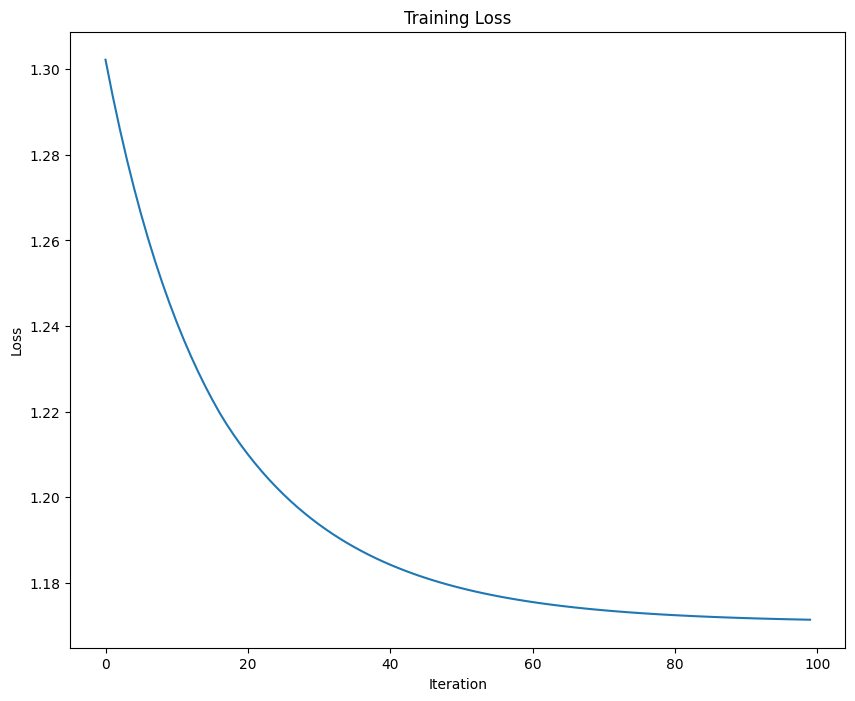

In [51]:
# net = TwoLayerMLP(input_size, hidden_size, num_classes)
# ## TODO: Plot ['loss_history'] here
import matplotlib.pyplot as plt

# Define a function to train the network and plot the loss history
def train_and_plot_loss(net, X, y, X_val, y_val,
                        learning_rate=1e-3, learning_rate_decay=0.95,
                        reg=1e-5, num_epochs=100,
                        batch_size=200, verbose=False):

    num_train = X.shape[0]
    num_val = X_val.shape[0]
    loss_history = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_train)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, num_train, batch_size):
            # Create a minibatch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute loss and gradients for the minibatch
            loss, grads = net.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # Update the network parameters using SGD
            for param_name in net.params:
                net.params[param_name] -= learning_rate * grads[param_name]

        # Decay the learning rate
        learning_rate *= learning_rate_decay

        if verbose:
            print(f"Epoch {epoch}/{num_epochs}: loss = {loss}")

    # Plot the loss history
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Create a new network
net = TwoLayerMLP(input_size, hidden_size, num_classes)

# Train the network and plot the loss history
train_and_plot_loss(net, X, y, X, y, num_epochs=100, verbose=True)


# Problem 4: Pytorch Intro (15 points)
## **Q4.0**: Pytorch tutorials
This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

Before starting the homework, please go over these introductory tutorials on the PyTorch webpage:

*   [60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [2]:
import torch

The `torch.Tensor` class is the basic building block in PyTorch and is used to hold data and parameters. The `autograd` package provides automatic differentiation for all operations on Tensors. After reading about Autograd in the tutorials above,  we will implement a few simple examples of what Autograd can do.

## **Q4.1**. Simple function
 Use `autograd` to do backpropagation on the simple function we saw in lecture, $f=(x+y)*z$.

**Q4.1.1** Create the three inputs with values $x=-2$, $y=5$ and $z=-4$ as tensors and set `requires_grad=True` to track computation on them.



In [3]:
import torch

# Create input tensors with requires_grad=True
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)

# Define the function f
f = (x + y) * z

# Compute gradients
f.backward()

# Access the gradients
grad_x = x.grad
grad_y = y.grad
grad_z = z.grad

print("Gradient of f with respect to x:", grad_x)
print("Gradient of f with respect to y:", grad_y)
print("Gradient of f with respect to z:", grad_z)


Gradient of f with respect to x: tensor(-4.)
Gradient of f with respect to y: tensor(-4.)
Gradient of f with respect to z: tensor(3.)


**Q4.1.2** Compute the $q=x+y$ and $f=q \times z$ functions, creating tensors for them in the process. Print out $q,f$, then run `f.backward(retain_graph=True)`, to compute the gradients w.r.t. $x,y,z$. The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it (freeing some memory). Print the gradients. Note that the gradient for $q$ will be `None` since it is an intermediate node, even though `requires_grad` for it is automatically set to `True`. To access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2). Compute the values by hand (or check the slides) to verify your solution.

In [4]:
import torch

# Create input tensors with requires_grad=True
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)

# Define q and f functions
q = x + y
f = q * z

# Print q and f values
print("q:", q)
print("f:", f)

# Compute gradients for f with respect to x, y, and z
f.backward(retain_graph=True)

# Access the gradients
grad_x = x.grad
grad_y = y.grad
grad_z = z.grad

print("Gradient of f with respect to x:", grad_x)
print("Gradient of f with respect to y:", grad_y)
print("Gradient of f with respect to z:", grad_z)

# The gradient for q will be None, as it's an intermediate node
print("Gradient of q:", q.grad)


q: tensor(3., grad_fn=<AddBackward0>)
f: tensor(-12., grad_fn=<MulBackward0>)
Gradient of f with respect to x: tensor(-4.)
Gradient of f with respect to y: tensor(-4.)
Gradient of f with respect to z: tensor(3.)
Gradient of q: None


/var/folders/pc/t2ndvnm152x7jbgb45nbwbxr0000gn/T/ipykernel_5031/3131743709.py:29: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print("Gradient of q:", q.grad)


**Q4.1.3** If we now run `backward()` again, it will add the gradients to their previous values. Try it by running the above cell multiple times. This is useful in some cases, but if we just wanted to re-compute the gradients again, we need to zero them first, then run `backward()`. Add this step, then try running the  backward function multiple times to make sure the answer is the same each time!

In [5]:
import torch

# Create input tensors with requires_grad=True
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)

# Define q and f functions
q = x + y
f = q * z

# Print q and f values
print("q:", q)
print("f:", f)

# Compute gradients for f with respect to x, y, and z
f.backward(retain_graph=True)

# Access the gradients
grad_x = x.grad
grad_y = y.grad
grad_z = z.grad

print("Gradient of f with respect to x:", grad_x)
print("Gradient of f with respect to y:", grad_y)
print("Gradient of f with respect to z:", grad_z)

# Zero the gradients before computing them again
x.grad.zero_()
y.grad.zero_()
z.grad.zero_()

# Compute gradients for f again
f.backward(retain_graph=True)

# Access the gradients
grad_x = x.grad
grad_y = y.grad
grad_z = z.grad

print("Gradient of f with respect to x (after zeroing):", grad_x)
print("Gradient of f with respect to y (after zeroing):", grad_y)
print("Gradient of f with respect to z (after zeroing):", grad_z)


q: tensor(3., grad_fn=<AddBackward0>)
f: tensor(-12., grad_fn=<MulBackward0>)
Gradient of f with respect to x: tensor(-4.)
Gradient of f with respect to y: tensor(-4.)
Gradient of f with respect to z: tensor(3.)
Gradient of f with respect to x (after zeroing): tensor(-4.)
Gradient of f with respect to y (after zeroing): tensor(-4.)
Gradient of f with respect to z (after zeroing): tensor(3.)


## **Q4.2** Neuron
 Implement the function corresponding to one neuron (logistic regression unit) that we saw in the lecture and compute the gradient w.r.t. $x$ and $w$. The function is $f=\sigma(w^Tx)$ where $\sigma()$ is the sigmoid function. Initialize $x=[-1, -2, 1]$ and the weights to $w=[2, -3, -3]$ where $w_3$ is the bias. Print out the gradients and double check their values by hand.

In [6]:
import torch

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Initialize input x and weights w
x = torch.tensor([-1.0, -2.0, 1.0], requires_grad=True)
w = torch.tensor([2.0, -3.0, -3.0], requires_grad=True)

# Compute the function f = sigmoid(w^T x)
f = sigmoid(torch.dot(w, x))

# Compute the gradient of f with respect to x and w
f.backward()

# Access the gradients
grad_x = x.grad
grad_w = w.grad

print("Gradient of f with respect to x:", grad_x)
print("Gradient of f with respect to w:", grad_w)


Gradient of f with respect to x: tensor([ 0.3932, -0.5898, -0.5898])
Gradient of f with respect to w: tensor([-0.1966, -0.3932,  0.1966])


## **Q4.3**. torch.nn
 We will now implement the same neuron function $f$ with the same variable values as in Q1.2, but using the `Linear` class from `torch.nn`, followed by the [Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid) class. In general, many useful functions are already implemented for us in this package. Compute the gradients $\partial f/\partial w$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.)

In [7]:
import torch
import torch.nn as nn

# Initialize input x and weights w
x = torch.tensor([-1.0, -2.0, 1.0], requires_grad=True)
w = torch.tensor([2.0, -3.0, -3.0], requires_grad=True)

# Create a Linear layer (equivalent to w^T*x)
linear_layer = nn.Linear(len(x), 1, bias=True)
linear_layer.weight = nn.Parameter(w.view(1, -1))  # Set weights to w
linear_layer.bias = nn.Parameter(torch.tensor([0.0]))  # Set bias to 0

# Apply the Sigmoid activation
sigmoid_layer = nn.Sigmoid()

# Compute the function f = sigmoid(w^T x)
f = sigmoid_layer(linear_layer(x))

# Compute the gradients
f.backward()

# Access the gradients of w
grad_w = linear_layer.weight.grad

print("Gradient of f with respect to w:", grad_w)


Gradient of f with respect to w: tensor([[-0.1966, -0.3932,  0.1966]])


## **Q4.4** Module
 Now lets put these two functions (Linear and Sigmoid) together into a "module". Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you have not already.

**Q4.4.1** Make a subclass of the `Module` class, called `Neuron`. Set variables to the same values as above. You will need to define the `__init__` and `forward`



In [2]:
# Define the Neuron class with necessary methods
class Neuron(nn.Module):
    def __init__(self):
        super(Neuron, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        
        return x

**Q4.4.2** Now create a  variable of your `Neuron` class called `my_neuron` and run backpropagation on it. Print out the gradients again. Make sure you zero out the gradients first, by calling `.zero_grad()` function of the parent class. Even if you will not re-compute the backprop, it is good practice to do this every time to avoid accumulating gradient!

In [3]:
# Create an instance of the Neuron class
my_neuron = Neuron()

# Define some input data (e.g., random data)
x = torch.tensor([[1.0, 2.0]], dtype=torch.float32, requires_grad=True)

# Forward pass through the neuron
output = my_neuron(x)

# Zero out the gradients before backpropagation
my_neuron.zero_grad()

# Compute the gradients
output.backward()

# Access the gradients of the linear layer's weights and bias
grad_w = my_neuron.linear.weight.grad
grad_b = my_neuron.linear.bias.grad

print("Gradient of f with respect to weights:", grad_w)
print("Gradient of f with respect to bias:", grad_b)


Gradient of f with respect to weights: tensor([[0.2496, 0.4991]])
Gradient of f with respect to bias: tensor([0.2496])


## **Q4.5**. Loss and SGD
 Now, lets train our neuron on some data. The code below creates a toy dataset containing a few inputs $x$ and outputs $y$ (a binary 0/1 label), as well as a function that plots the data and current solution.

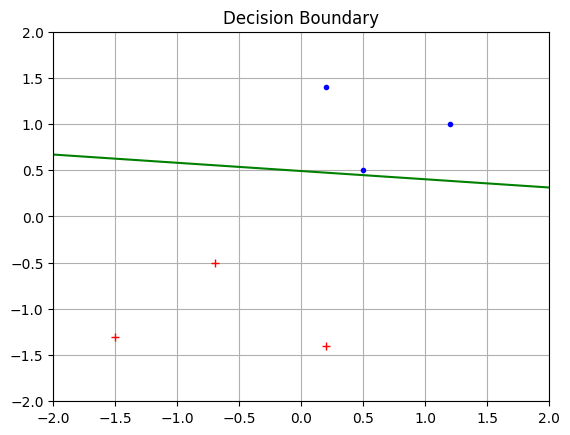

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Create the Neuron instance
my_neuron = Neuron()

# Define the dataset
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 1, 1, 1], dtype=torch.float32)

# Define the binary cross-entropy loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = my_neuron(x)
    loss = criterion(outputs.view(-1), y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the data points
plt.plot(x[y == 1, 0], x[y == 1, 1], 'r+')
plt.plot(x[y == 0, 0], x[y == 0, 1], 'b.')

# Plot the decision boundary line
w = my_neuron.linear.weight.detach().numpy()
b = my_neuron.linear.bias.detach().numpy()
slope = -w[0, 0] / w[0, 1]
intercept = -b / w[0, 1]
plt.plot([-2, 2], [slope * (-2) + intercept, slope * 2 + intercept], 'g-')

plt.grid(True)
plt.axis([-2, 2, -2, 2])
plt.title("Decision Boundary")
plt.show()


**Q4.5.1** Declare an object `criterion` of type `nn.CrossEntropyLoss`. Note that this can be called as a function on two tensors, one representing the network outputs and the other, the targets that the network is being trained to predict, to return the loss. Print the value of the loss on the dataset using the initial weights and bias defined above in Q4.2.

w0 = -0.04452639818191528 w1 = -0.4993363916873932 bias = 0.24556435644626617


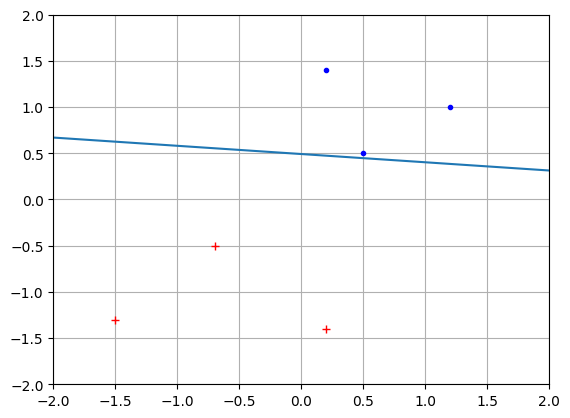

In [5]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])


y = torch.tensor([0, 0, 0, 1, 1, 1 ])

def plot_soln(x, y, params):
  plt.plot(x[y==1,0], x[y==1,1], 'r+')
  plt.plot(x[y==0,0], x[y==0,1], 'b.')
  plt.grid(True)
  plt.axis([-2, 2, -2, 2])



  # NOTE : This may depend on how you implement Neuron.
  #   Change accordingly
  w0 = params[0][0][0].item()
  w1 = params[0][0][1].item()
  bias = params[1][0].item()

  print("w0 =", w0, "w1 =", w1, "bias =", bias)
  dbx = torch.tensor([-2, 2])
  dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
  plt.plot(dbx, dby)

params = list(my_neuron.parameters())
plot_soln(x, y, params)

**Q4.5.2** Print out the chain of `grad_fn` functions backwards starting from `loss.grad_fn`  to demonstrate what backpropagation will be run on.

In [6]:
import torch

# Initialize the weights and bias
w = torch.tensor([2.0, -3.0], dtype=torch.float32, requires_grad=True)
b = torch.tensor([-3.0], dtype=torch.float32, requires_grad=True)

# Define the input and target tensors
x = torch.tensor([[1.2, 1.0]], dtype=torch.float32, requires_grad=True)
y = torch.tensor([1], dtype=torch.float32)

# Calculate the binary cross-entropy loss
linear_output = torch.sum(x * w) + b
sigmoid_output = torch.sigmoid(linear_output)
loss = torch.nn.functional.binary_cross_entropy(sigmoid_output, y)

# Perform backpropagation
loss.backward()

# Print out the chain of grad_fn functions
current_grad_fn = loss.grad_fn
while current_grad_fn is not None:
    print(current_grad_fn)
    current_grad_fn = current_grad_fn.next_functions[0][0] if current_grad_fn.next_functions else None


**Q4.5.3** Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` package to train your classifier on the toy dataset. Use the entire dataset in each batch. Use a learning rate of $0.01$ (no other hyperparameters). You will need to write a training loop that uses the `.step()` function of the optimizer. Plot the solution and print the loss after 1000 iterations.

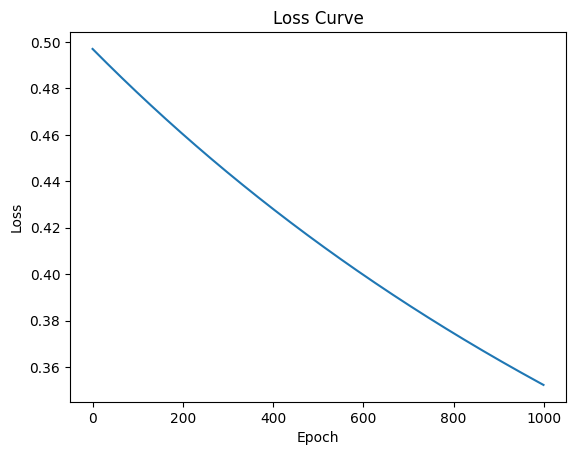

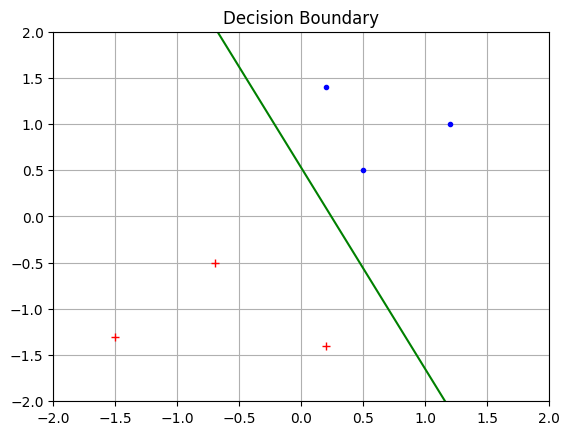

Final Loss: 0.352335125207901


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Neuron class with necessary methods
class Neuron(nn.Module):
    def __init__(self):
        super(Neuron, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Create the Neuron instance
my_neuron = Neuron()

# Define the dataset
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 1, 1, 1], dtype=torch.float32)

# Define the binary cross-entropy loss and SGD optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = my_neuron(x)
    loss = criterion(outputs.view(-1), y)
    losses.append(loss.item())
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Plot the data points
plt.plot(x[y == 1, 0], x[y == 1, 1], 'r+')
plt.plot(x[y == 0, 0], x[y == 0, 1], 'b.')

# Plot the decision boundary line
w = my_neuron.linear.weight.detach().numpy()
b = my_neuron.linear.bias.detach().numpy()
slope = -w[0, 0] / w[0, 1]
intercept = -b / w[0, 1]
plt.plot([-2, 2], [slope * (-2) + intercept, slope * 2 + intercept], 'g-')

plt.grid(True)
plt.axis([-2, 2, -2, 2])
plt.title("Decision Boundary")
plt.show()

# Print the final loss
print("Final Loss:", losses[-1])


**Q4.5.4** How many thousands of iterations does it take (approximately) until the neuron learns to classify the data correctly? **bold text**

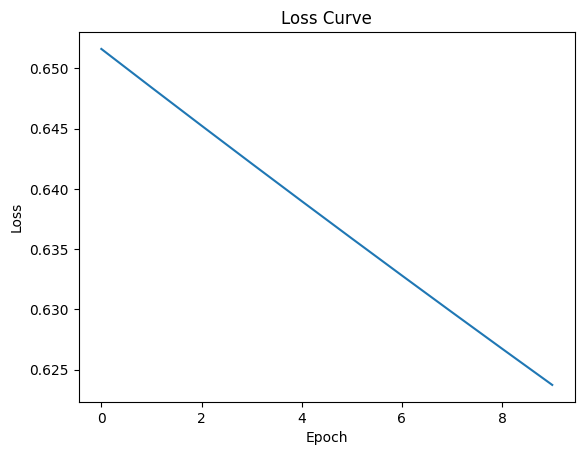

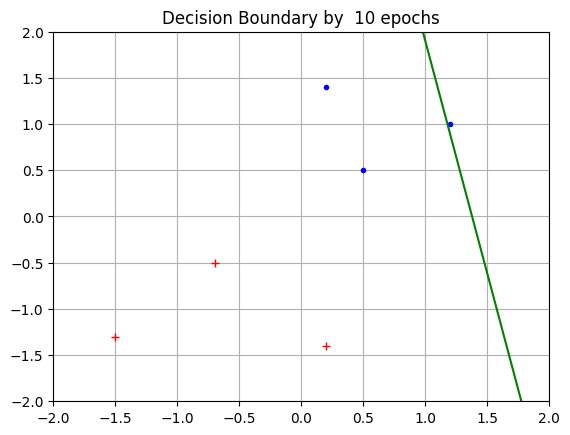

Final Loss: 0.6237214207649231


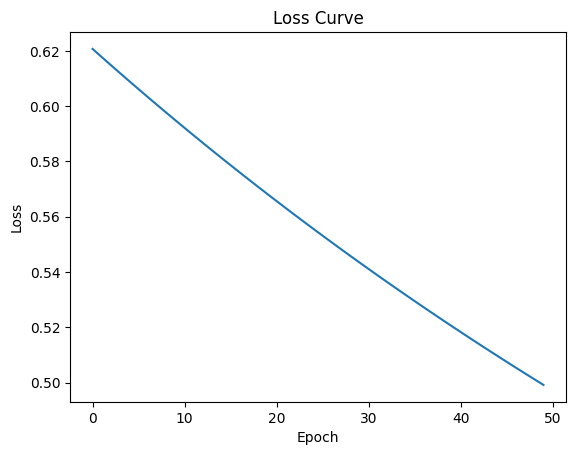

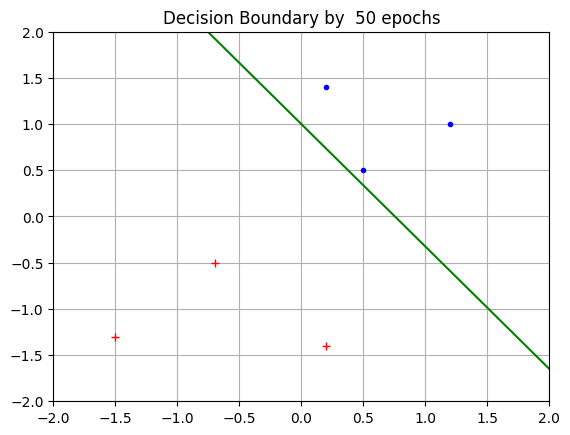

Final Loss: 0.4991411864757538


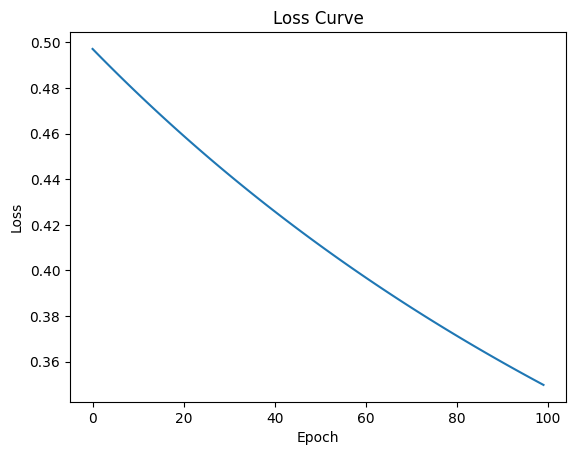

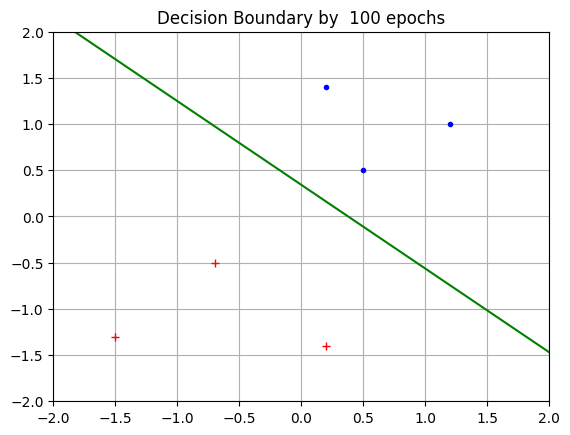

Final Loss: 0.34983524680137634


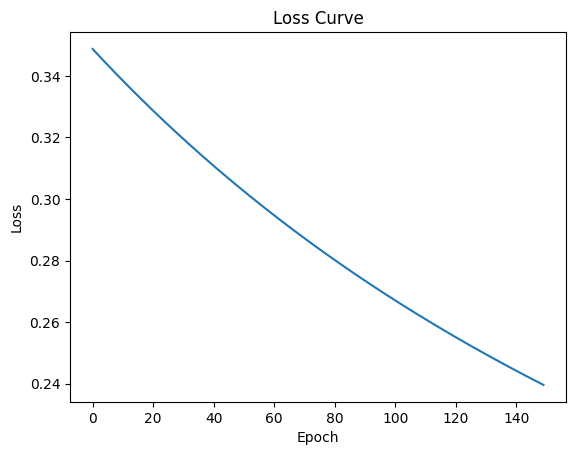

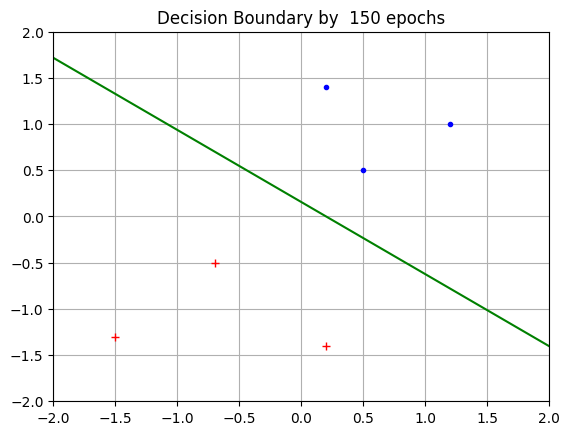

Final Loss: 0.23960459232330322


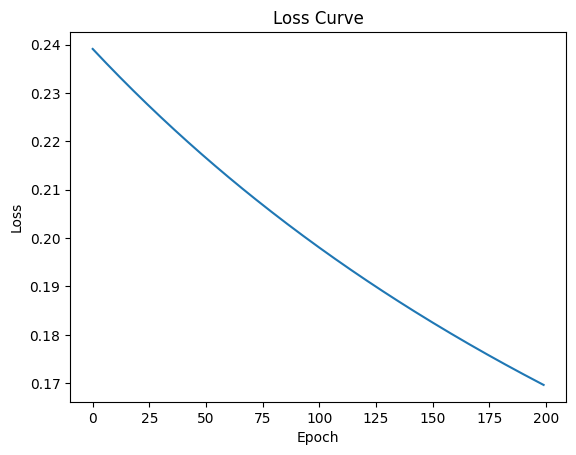

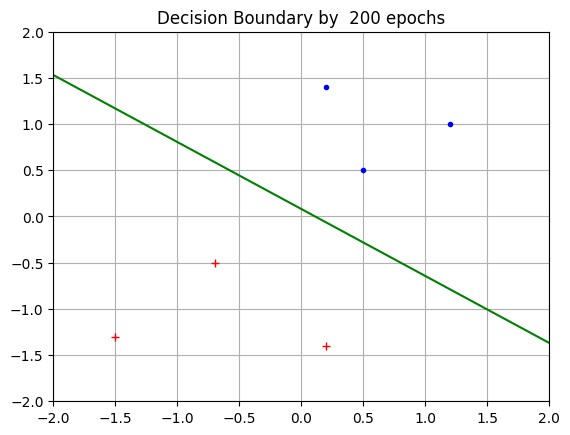

Final Loss: 0.1696532964706421


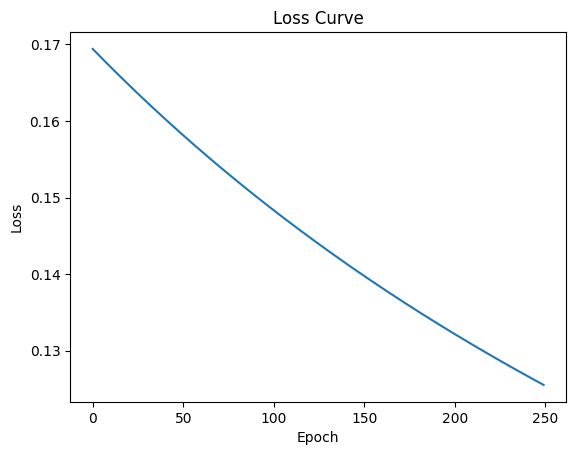

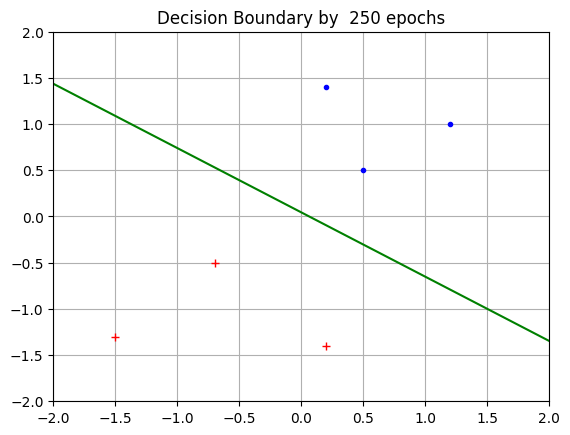

Final Loss: 0.12553246319293976


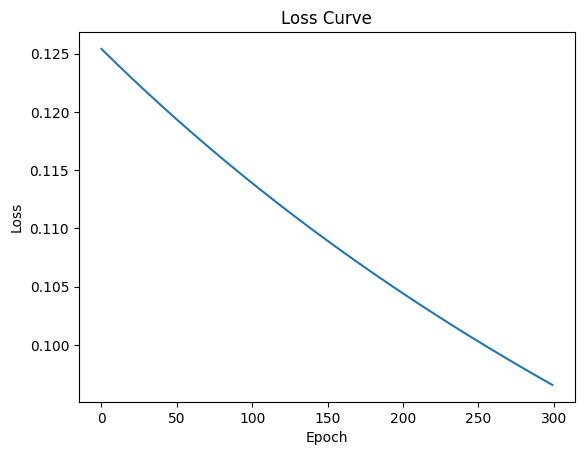

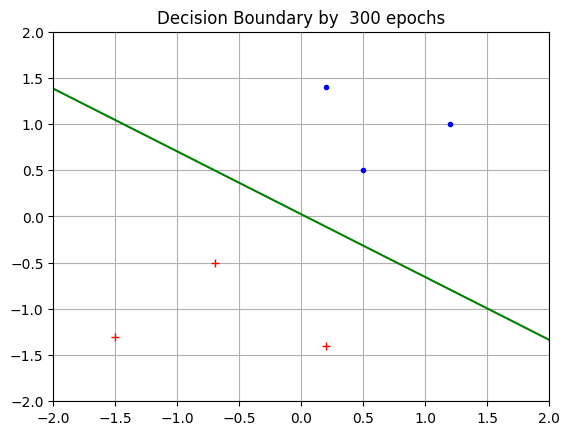

Final Loss: 0.09657689929008484


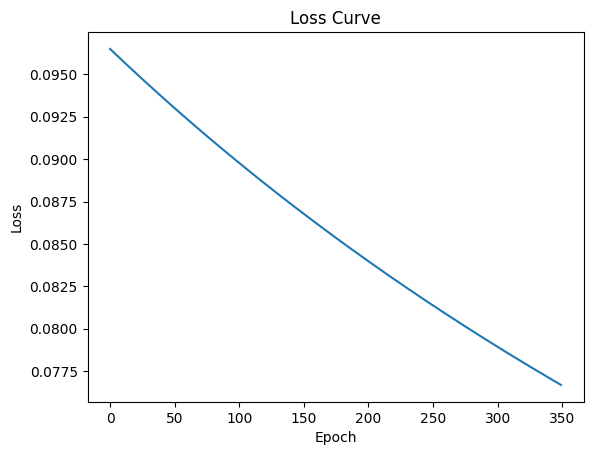

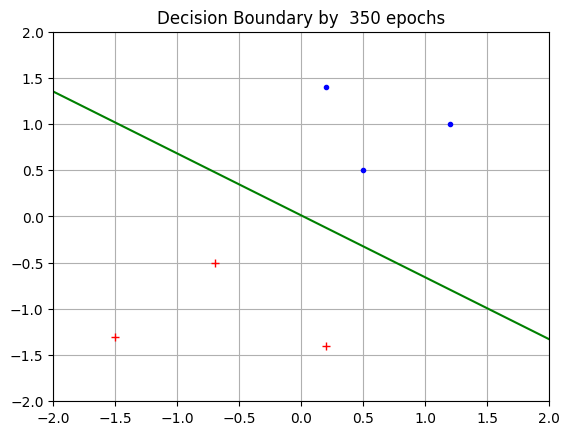

Final Loss: 0.07667898386716843


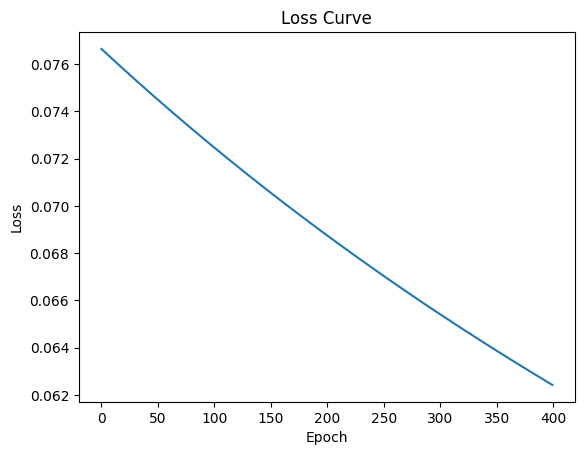

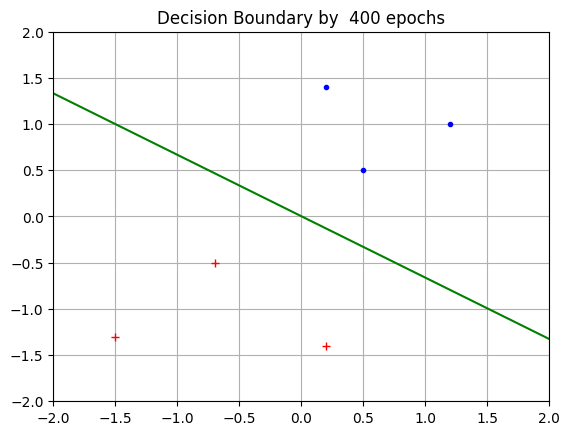

Final Loss: 0.06242959201335907


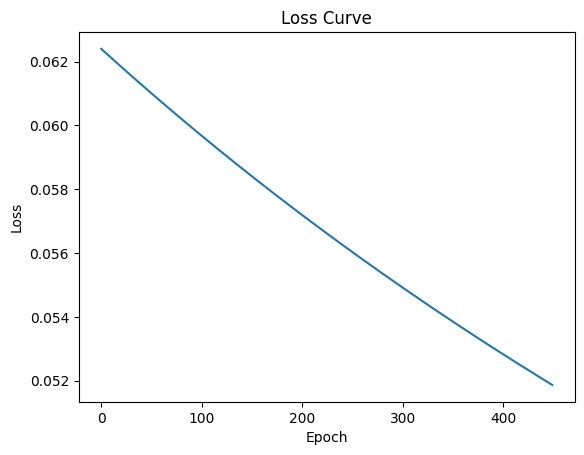

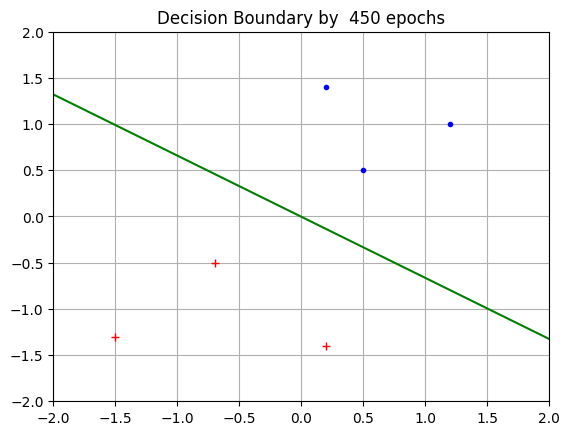

Final Loss: 0.05186611786484718


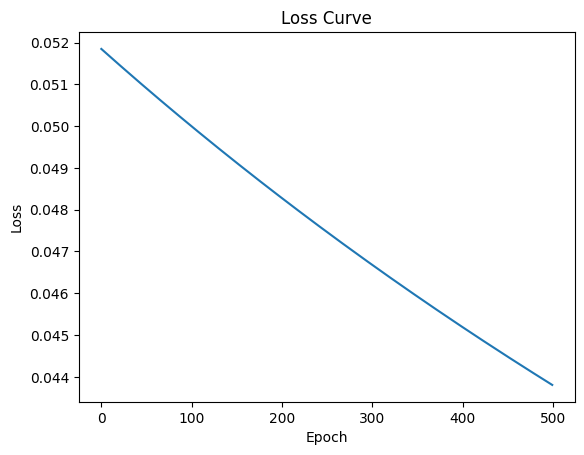

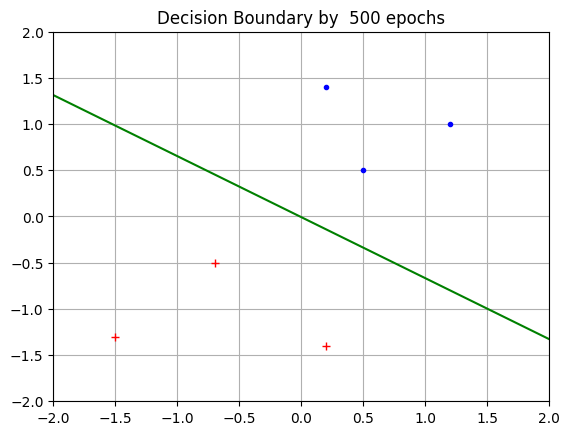

Final Loss: 0.043807581067085266


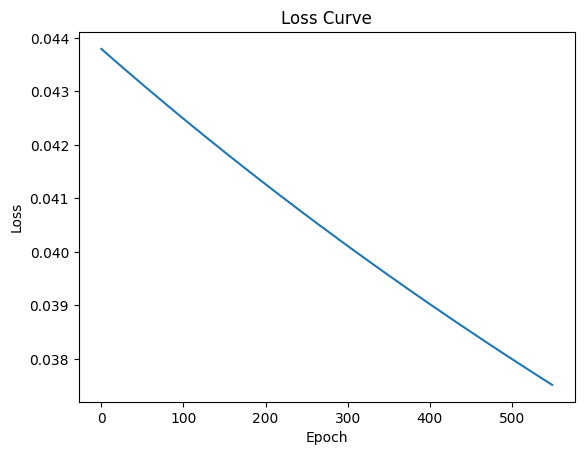

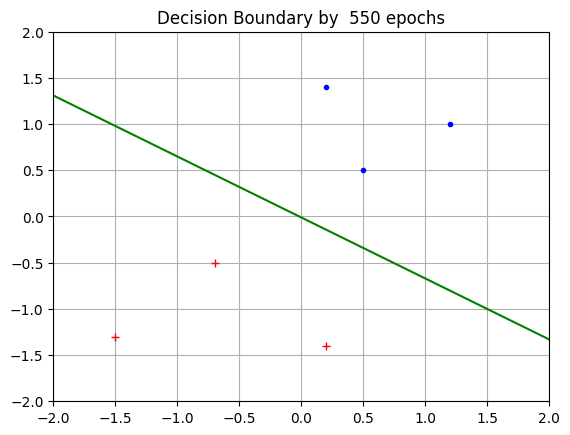

Final Loss: 0.03751226142048836


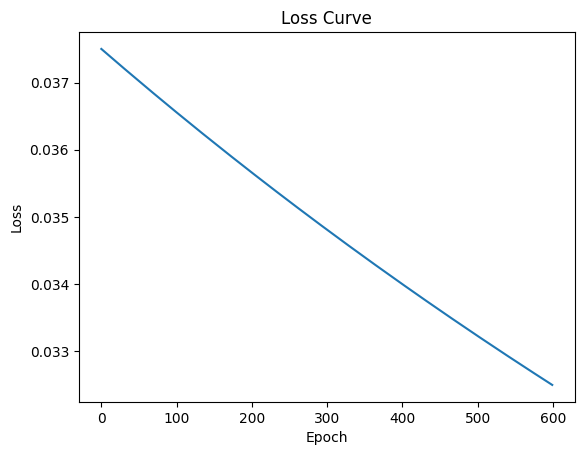

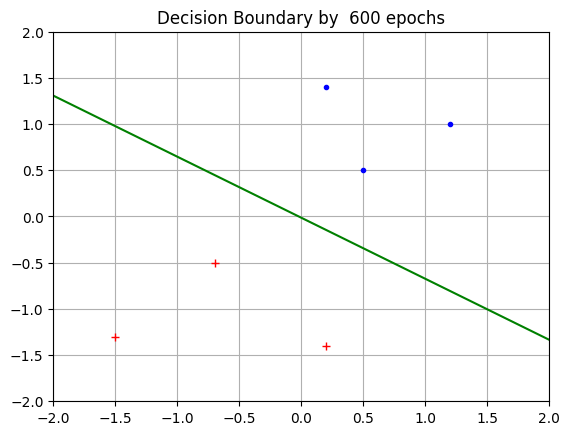

Final Loss: 0.03249538317322731


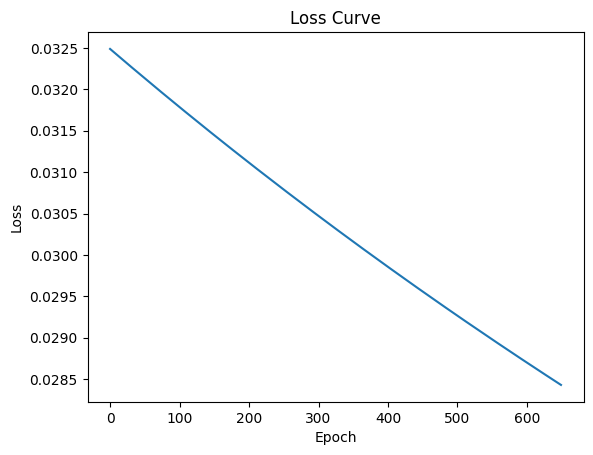

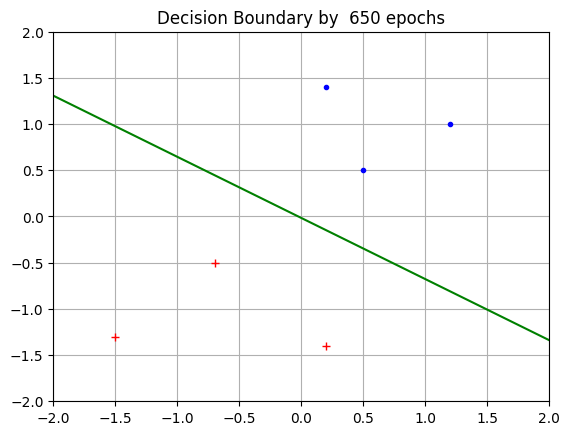

Final Loss: 0.02842928282916546


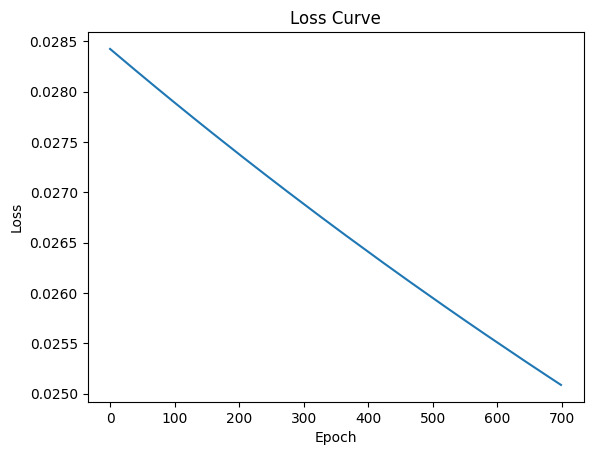

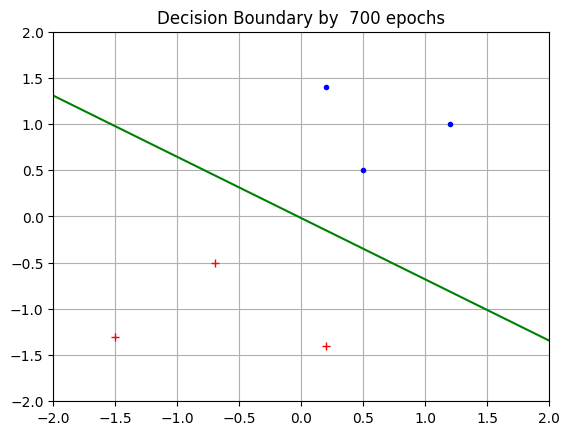

Final Loss: 0.025085872039198875


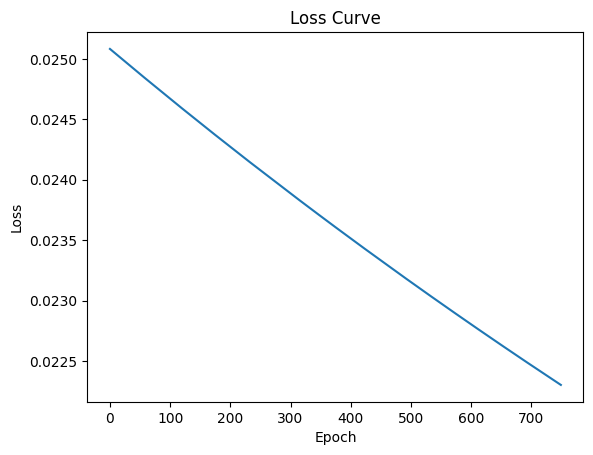

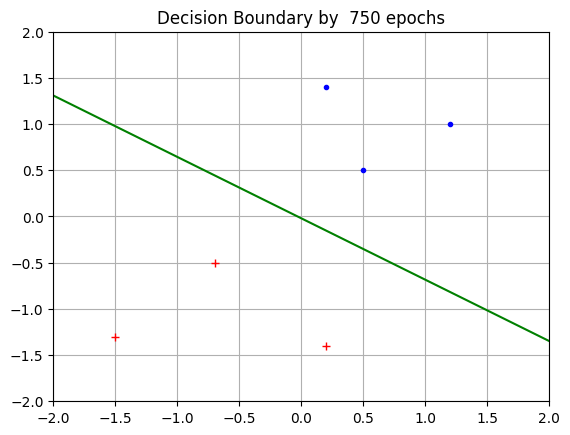

Final Loss: 0.022301984950900078


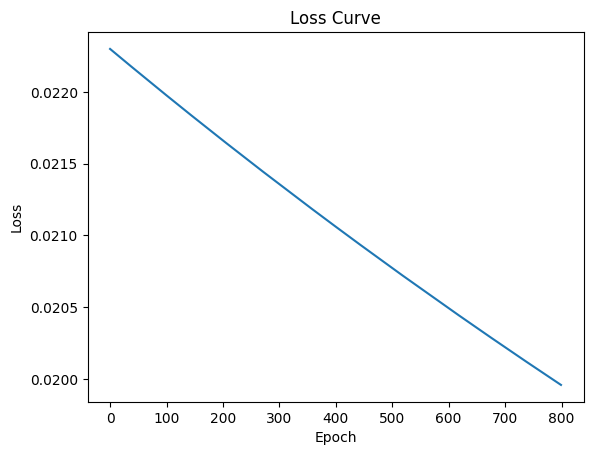

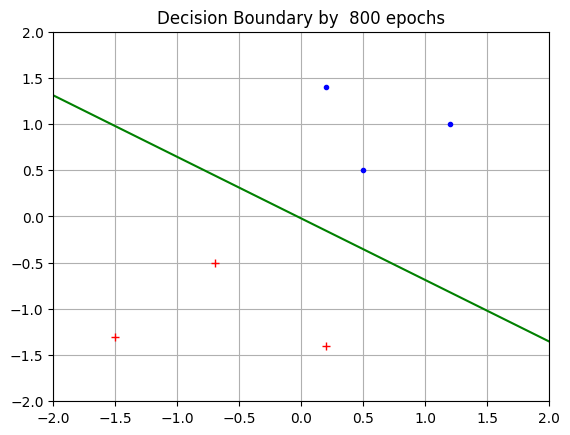

Final Loss: 0.01995854452252388


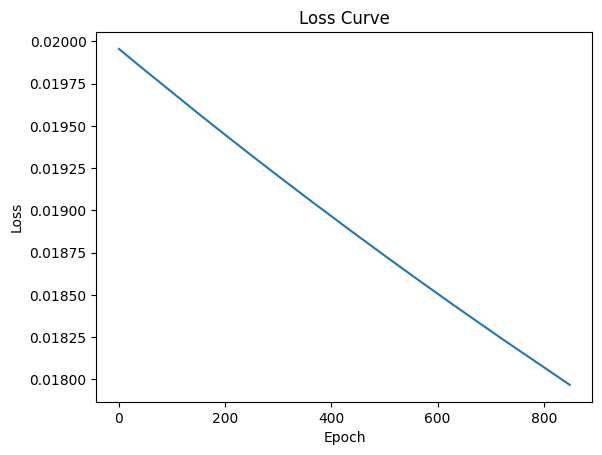

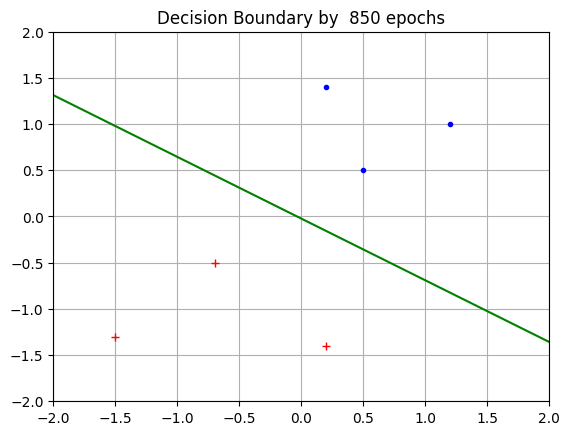

Final Loss: 0.017966696992516518


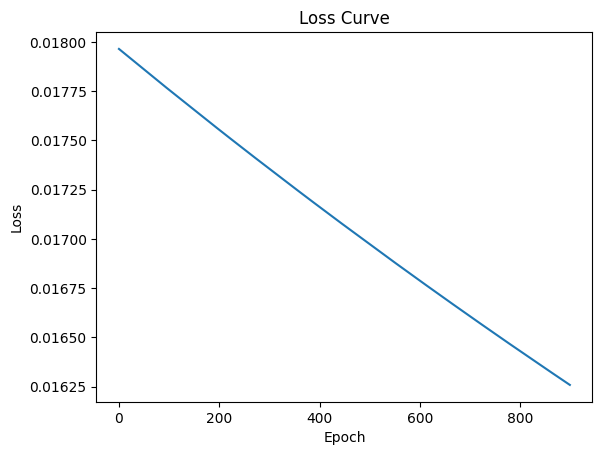

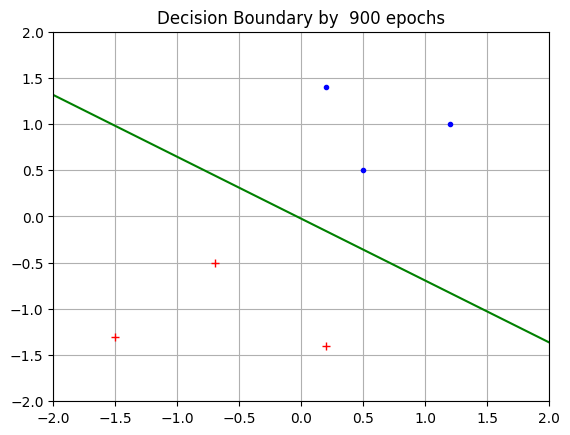

Final Loss: 0.01625913567841053


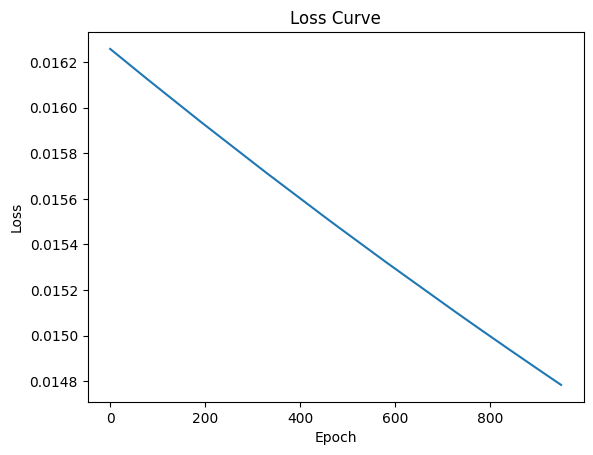

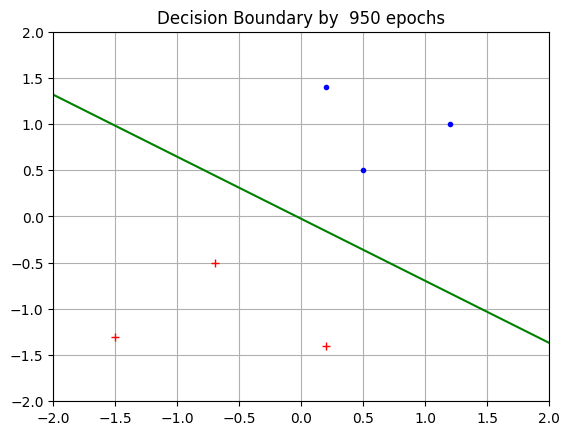

Final Loss: 0.014783953316509724


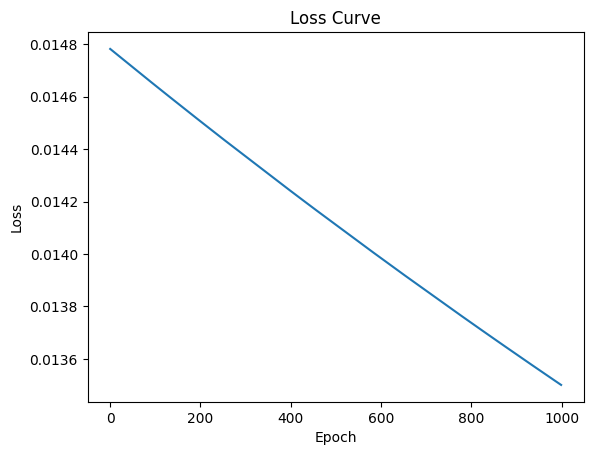

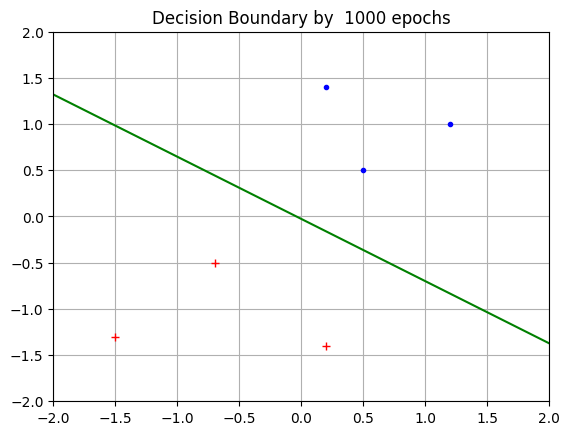

Final Loss: 0.013500716537237167


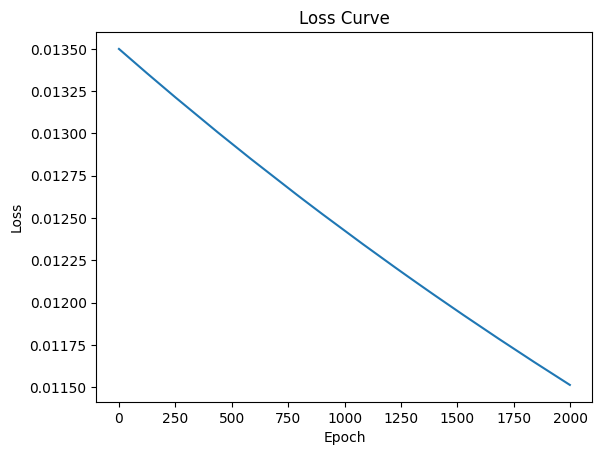

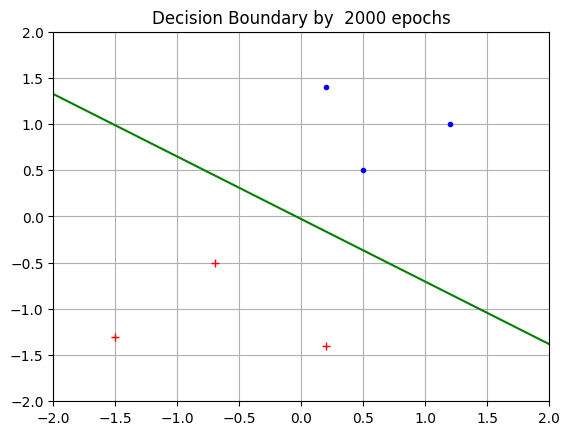

Final Loss: 0.01151368860155344


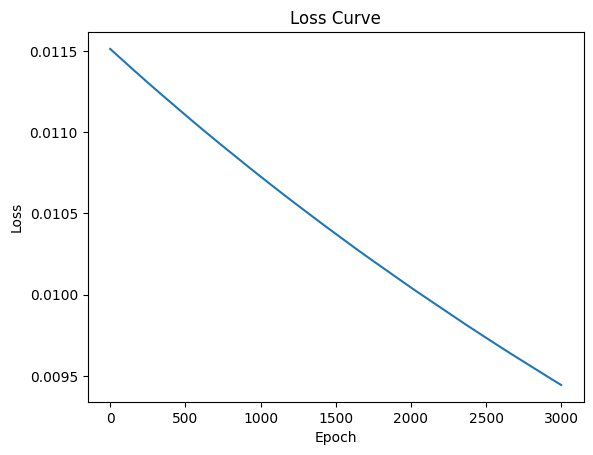

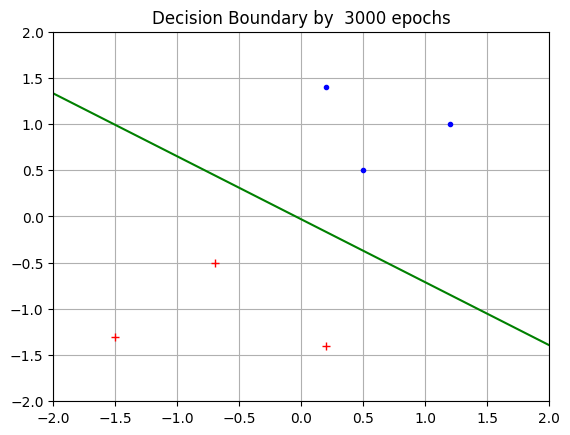

Final Loss: 0.009444133378565311


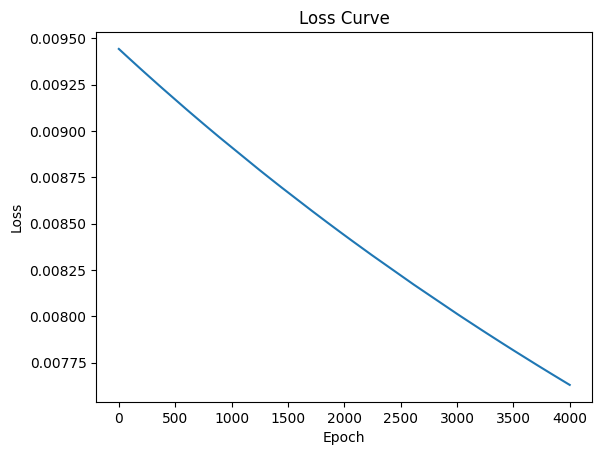

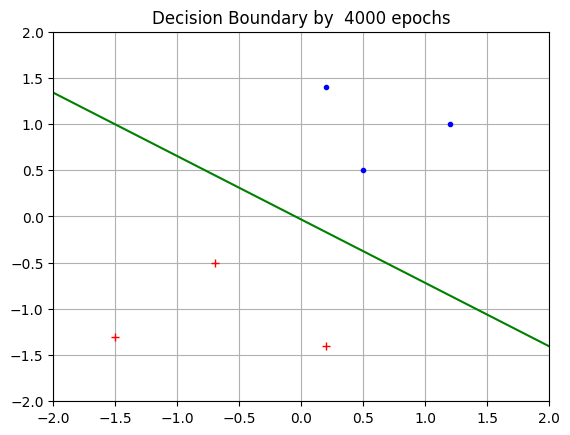

Final Loss: 0.007629040628671646


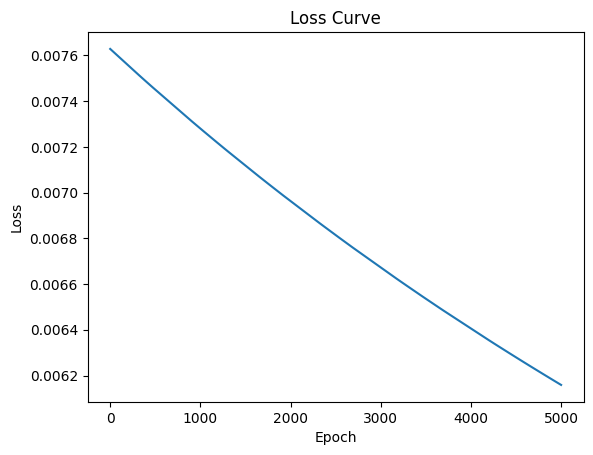

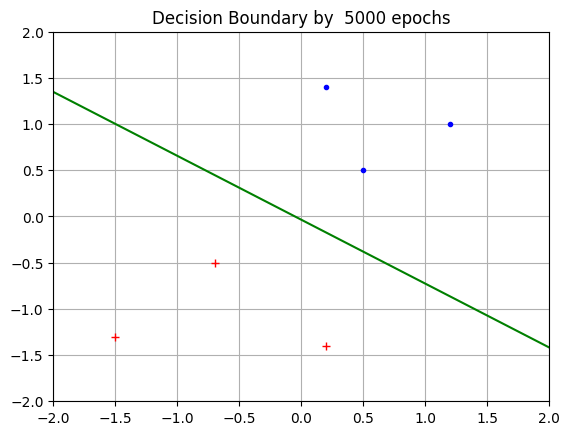

Final Loss: 0.006158790085464716


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Neuron class with necessary methods
class Neuron(nn.Module):
    def __init__(self):
        super(Neuron, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Create the Neuron instance
my_neuron = Neuron()

# Define the dataset
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 1, 1, 1], dtype=torch.float32)

# Define the binary cross-entropy loss and SGD optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(my_neuron.parameters(), lr=0.01)

# Training loop
num_epochs = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 3000, 4000, 5000]

for i in num_epochs:
    losses = []
    for epoch in range(i):
        # Forward pass
        outputs = my_neuron(x)
        loss = criterion(outputs.view(-1), y)
        losses.append(loss.item())
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the loss curve
    plt.plot(range(i), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()
    
    # Plot the data points
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'r+')
    plt.plot(x[y == 0, 0], x[y == 0, 1], 'b.')
    
    # Plot the decision boundary line
    w = my_neuron.linear.weight.detach().numpy()
    b = my_neuron.linear.bias.detach().numpy()
    slope = -w[0, 0] / w[0, 1]
    intercept = -b / w[0, 1]
    plt.plot([-2, 2], [slope * (-2) + intercept, slope * 2 + intercept], 'g-')
    
    plt.grid(True)
    plt.axis([-2, 2, -2, 2])
    plt.title("Decision Boundary by % i epochs" %i)
    plt.show()
    
    # Print the final loss
    print("Final Loss:", losses[-1])


***Solution***:
I set num_epochs = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000, 3000, 4000, 5000], and visually check the result. I found that after 150 epochs, the data points can be separate by the classifier.


## **Q4.6**. Hidden space ablation

Now let's look at the size of network's hidden space. We will create and train a **2-layer MLP** network on the [SVHN Dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.SVHN.html).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](https://www.researchgate.net/profile/Georgios-Drainakis/publication/346718116/figure/fig2/AS:966456476987393@1607432588092/Representation-of-SVHN-dataset.ppm)

In this problem, we turn the input images into grayscale and then flat them into 1-D vector. First, download the SVHN dataset using `torchvision` and display the images in the first batch. Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as the normalization, batch size of 4 for the `torch.utils.data.DataLoader`, etc.


Using downloaded and verified file: ./data/train_32x32.mat
    3     0     4     6


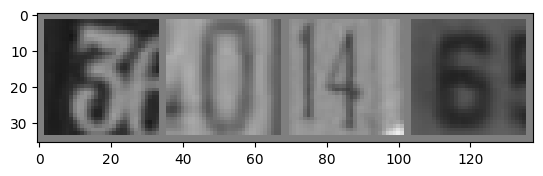

In [13]:
# solution here
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')



# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)



# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Q4.6.1 2-layer MLP

Next, we will train a 2-layer MLP on the data. We have defined a simple 2-layer MLP for you with two fc layers and LeakyReLU activation.



In [14]:
# solution here
import torch.nn as nn
import torch.nn.functional as F

class Neuron(nn.Module):
    def __init__(self, hidden_size):
        super(Neuron, self).__init__()
        self.l1 = nn.Linear(1024, hidden_size)
        self.l2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 1024)
        x = F.leaky_relu(self.l1(x))
        x = self.l2(x)
        return x

You can check the number of parameters in the model by printing out the model summary.

In [15]:
def model_summary(model):
  print("model_summary")
  print()
  print("Layer_name"+"\t"*7+"Number of Parameters")
  print("="*100)
  model_parameters = [layer for layer in model.parameters() if layer.requires_grad]
  layer_name = [child for child in model.children()]
  j = 0
  total_params = 0
  print("\t"*10)
  for i in layer_name:
    print()
    param = 0
    try:
      bias = (i.bias is not None)
    except:
      bias = False
    if not bias:
      param =model_parameters[j].numel()+model_parameters[j+1].numel()
      j = j+2
    else:
      param =model_parameters[j].numel()
      j = j+1
    print(str(i)+"\t"*3+str(param))
    total_params+=param
  print("="*100)
  print(f"Total Params:{total_params}")

my_neuron = Neuron(10)
model_summary(my_neuron)

model_summary

Layer_name							Number of Parameters
										

Linear(in_features=1024, out_features=10, bias=True)			10240

Linear(in_features=10, out_features=10, bias=True)			10
Total Params:10250


Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

**Use GPU in Colab**: click *Runtime* in the menu bar -> click *Change runtime type* -> select *T4 GPU*

In [16]:
# solution here
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(my_neuron.parameters(), lr=learning_rate, momentum=momentum)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if we set the hardware to GPU in the Notebook settings, this should print a CUDA device:
print(device)

my_neuron.to(device)


cpu


Neuron(
  (l1): Linear(in_features=1024, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
)

### Q4.6.2 Training
Complete the training loop that makes five full passes through the dataset (five epochs) using SGD. Your batch size should be 4 and hidden size is 10.

In [17]:
my_neuron = Neuron(10)

# create your optimizer
criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
momentum = 0.9
optimizer = optim.SGD(my_neuron.parameters(), lr=learning_rate, momentum=momentum)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
      
    # Forward pass
    outputs = my_neuron(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 2.084
[1,  4000] loss: 1.902
[1,  6000] loss: 1.855
[1,  8000] loss: 1.834
[1, 10000] loss: 1.814
[1, 12000] loss: 1.848
[1, 14000] loss: 1.803
[1, 16000] loss: 1.832
[1, 18000] loss: 1.803
[2,  2000] loss: 1.789
[2,  4000] loss: 1.806
[2,  6000] loss: 1.811
[2,  8000] loss: 1.837
[2, 10000] loss: 1.833
[2, 12000] loss: 1.856
[2, 14000] loss: 1.840
[2, 16000] loss: 1.824
[2, 18000] loss: 1.839
[3,  2000] loss: 1.826
[3,  4000] loss: 1.787
[3,  6000] loss: 1.847
[3,  8000] loss: 1.845
[3, 10000] loss: 1.852
[3, 12000] loss: 1.845
[3, 14000] loss: 1.836
[3, 16000] loss: 1.837
[3, 18000] loss: 1.833
[4,  2000] loss: 1.836
[4,  4000] loss: 1.881
[4,  6000] loss: 1.815
[4,  8000] loss: 1.839
[4, 10000] loss: 1.869
[4, 12000] loss: 1.892
[4, 14000] loss: 1.868
[4, 16000] loss: 1.807
[4, 18000] loss: 1.879
[5,  2000] loss: 1.798
[5,  4000] loss: 1.867
[5,  6000] loss: 1.860
[5,  8000] loss: 1.869
[5, 10000] loss: 1.856
[5, 12000] loss: 1.831
[5, 14000] loss: 1.866
[5, 16000] 

Train the model again but this time set the hidden size as 100.


In [18]:
my_neuron_large = Neuron(100)

# create your optimizer
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(my_neuron.parameters(), lr=learning_rate, momentum=momentum)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
      
    # Forward pass
    outputs = my_neuron(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 1.681
[1,  4000] loss: 1.599
[1,  6000] loss: 1.525
[1,  8000] loss: 1.518
[1, 10000] loss: 1.506
[1, 12000] loss: 1.477
[1, 14000] loss: 1.514
[1, 16000] loss: 1.478
[1, 18000] loss: 1.497
[2,  2000] loss: 1.474
[2,  4000] loss: 1.452
[2,  6000] loss: 1.463
[2,  8000] loss: 1.477
[2, 10000] loss: 1.439
[2, 12000] loss: 1.448
[2, 14000] loss: 1.468
[2, 16000] loss: 1.436
[2, 18000] loss: 1.435
[3,  2000] loss: 1.460
[3,  4000] loss: 1.445
[3,  6000] loss: 1.433
[3,  8000] loss: 1.425
[3, 10000] loss: 1.415
[3, 12000] loss: 1.398
[3, 14000] loss: 1.416
[3, 16000] loss: 1.418
[3, 18000] loss: 1.430
[4,  2000] loss: 1.377
[4,  4000] loss: 1.432
[4,  6000] loss: 1.412
[4,  8000] loss: 1.404
[4, 10000] loss: 1.414
[4, 12000] loss: 1.415
[4, 14000] loss: 1.422
[4, 16000] loss: 1.392
[4, 18000] loss: 1.426
[5,  2000] loss: 1.397
[5,  4000] loss: 1.404
[5,  6000] loss: 1.376
[5,  8000] loss: 1.413
[5, 10000] loss: 1.414
[5, 12000] loss: 1.390
[5, 14000] loss: 1.383
[5, 16000] 

### Q4.6.3
Write code to plot the loss curve during training for the two hidden size configuration.
Compare the performance between the two configurations, then describe what can you learn from the plot.

[1,  2000] loss: 2.154
[1,  4000] loss: 1.889
[1,  6000] loss: 1.709
[1,  8000] loss: 1.604
[1, 10000] loss: 1.539
[1, 12000] loss: 1.527
[1, 14000] loss: 1.471
[1, 16000] loss: 1.455
[1, 18000] loss: 1.459
[2,  2000] loss: 1.424
[2,  4000] loss: 1.459
[2,  6000] loss: 1.450
[2,  8000] loss: 1.420
[2, 10000] loss: 1.404
[2, 12000] loss: 1.401
[2, 14000] loss: 1.401
[2, 16000] loss: 1.413
[2, 18000] loss: 1.418
[3,  2000] loss: 1.362
[3,  4000] loss: 1.392
[3,  6000] loss: 1.402
[3,  8000] loss: 1.380
[3, 10000] loss: 1.405
[3, 12000] loss: 1.385
[3, 14000] loss: 1.349
[3, 16000] loss: 1.388
[3, 18000] loss: 1.372
[4,  2000] loss: 1.362
[4,  4000] loss: 1.364
[4,  6000] loss: 1.337
[4,  8000] loss: 1.358
[4, 10000] loss: 1.342
[4, 12000] loss: 1.399
[4, 14000] loss: 1.385
[4, 16000] loss: 1.339
[4, 18000] loss: 1.360
[5,  2000] loss: 1.339
[5,  4000] loss: 1.361
[5,  6000] loss: 1.344
[5,  8000] loss: 1.344
[5, 10000] loss: 1.341
[5, 12000] loss: 1.332
[5, 14000] loss: 1.332
[5, 16000] 

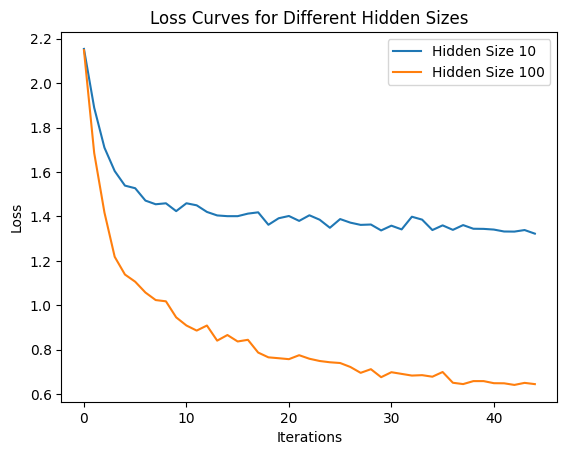

In [20]:
my_neuron = Neuron(10)

# create your optimizer
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(my_neuron.parameters(), lr=learning_rate, momentum=momentum)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats1 = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
      
    # Forward pass
    outputs = my_neuron(inputs)
    loss = criterion(outputs, labels)
        
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats1.append(running_loss / 2000)
        running_loss = 0.0

# ------------------------------------------------------------------------------------------

my_neuron = Neuron(100)

# create your optimizer
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
momentum = 0.9
optimizer = optim.SGD(my_neuron.parameters(), lr=learning_rate, momentum=momentum)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats2 = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
      
    # Forward pass
    outputs = my_neuron(inputs)
    loss = criterion(outputs, labels)
        
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats2.append(running_loss / 2000)
        running_loss = 0.0
        
# # Plot the loss curves for each hidden size configuration
# for config_idx, hidden_size in enumerate(hidden_sizes):
plt.plot(range(len(stats1)), stats1, label=f'Hidden Size 10')
plt.plot(range(len(stats2)), stats2, label=f'Hidden Size 100')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for Different Hidden Sizes')
plt.show()

**solution**:
From the loss curve, we found that increasing the number of neurons in a neural network, particularly in the hidden layers, can have several effects on the loss and the network's performance. However, the statement "increasing the number of neurons decreases the loss" is not universally true and depends on various factors and the specific problem at hand. Here are some factors to consider:

1. **Expressiveness**: Adding more neurons increases the model's capacity to learn complex patterns in the data. This increased expressiveness can help the model fit the training data more closely, potentially leading to a decrease in training loss.

2. **Overfitting**: While increasing the number of neurons can help the model fit the training data better, it also increases the risk of overfitting. Overfitting occurs when the model becomes too specialized in learning noise or irrelevant details in the training data, which can lead to poor generalization to unseen data (higher test loss).

3. **Regularization**: To prevent overfitting when increasing the number of neurons, regularization techniques such as L2 regularization (weight decay) or dropout can be applied. Regularization encourages the network to have smaller weights or encourages sparsity in the neuron activations, which can help control overfitting.

4. **Learning Capacity**: Increasing the number of neurons may require adjusting other hyperparameters such as learning rate, batch size, or training duration. Failure to do so can result in slow convergence or divergence during training.

5. **Data Size**: The impact of increasing the number of neurons depends on the size and complexity of the dataset. For small datasets, a large number of neurons may lead to overfitting, while for large datasets, it may help capture more intricate patterns.

6. **Computational Resources**: Training a neural network with a large number of neurons requires more computational resources, including memory and processing power.

In summary, while increasing the number of neurons can potentially reduce the training loss by increasing model capacity and expressiveness, it should be done cautiously to avoid overfitting. Proper regularization and hyperparameter tuning are essential to achieve good generalization to unseen data and ultimately decrease the overall loss on a validation or test dataset.